# Unemployment Models


In [1]:
library(UsingR)
library(quantmod)
library(ggplot2)
library(grid)
library(gridExtra)
library(knitr)
library(kableExtra)
library(tools)
library(zoo)
library(signal)
library(stringr)
library(corrplot)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(Quandl)
library(nnet)
library(readr)
#library(devtools)
#install_github("andrewuhl/RollingWindow")
library(RollingWindow)
#install.packages("EIAdata")
library(EIAdata)
library(gtable)
library(data.table)
library(readxl)
library(plotly)

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer


Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.


Attaching package: 'quantmod'


The following object is masked from 'package:Hmisc':

    Lag



Attaching package: 'signal'


The following objects are masked from 'package:stats'

Call helper functions

In [2]:
source("plotHelper.r")

Define the source of the data (local or web) and whether to update the models.

In [3]:
b.refresh.models = FALSE

Define the plotting ranges and vertical defaults

In [4]:
dt.recent = as.Date("2017-01-01")
d.GSPC.max = 4000

Load up the off-line data

In [5]:
load("C:/Users/Rainy/OneDrive//RecessionIndicator_Buffer.RData")

This snippet is needed because some of the ticker symbols include are invalid variable names so re-cast those variable names.

In [6]:
df.symbols$string.symbol <-
  str_replace_all(df.symbols$string.symbol, "[^[:alnum:]]", "")

Do the interpolation to daily samples and tidy the data

In [7]:
source("calcInterpolate.r")

In [8]:
df.data <- calcInterpolate(df.data, df.symbols)

Warning message in merge.xts(xtsData, get(df.symbols$string.symbol[idx])):
"NAs introduced by coercion"


Truncate the data. A very few data series do go back to 1854, but most don't even go past WWII so truncate the dataframe

In [9]:
df.data <- df.data[as.Date(rownames(df.data)) > as.Date("1940-01-01"),]

Create aggreagate data series
Some analysis requires that two or more series be combined. For example, normallizing debt by GDP to get a sense of the proportion of debt to the total economy helps understand the debt cycle.

In [10]:
source("calcAggregateSeries.r")

Calculate the year-over-year, 50 day moving average, and other features in the data

In [11]:
source("calcFeatures.r")

In [12]:
lst.df <- calcFeatures(df.data, df.symbols)
df.data <- lst.df[[1]]
df.symbols <- lst.df[[2]]

[1] "USREC has zero or negative values. Log series will be zero."
[1] "GSFTX.Volume has zero or negative values. Log series will be zero."
[1] "LFMIX.Volume has zero or negative values. Log series will be zero."
[1] "LFMCX.Volume has zero or negative values. Log series will be zero."
[1] "LFMAX.Volume has zero or negative values. Log series will be zero."
[1] "LCSIX.Volume has zero or negative values. Log series will be zero."
[1] "VBIRX.Volume has zero or negative values. Log series will be zero."
[1] "VFSUX.Volume has zero or negative values. Log series will be zero."
[1] "LTUIX.Volume has zero or negative values. Log series will be zero."
[1] "PTTPX.Volume has zero or negative values. Log series will be zero."
[1] "NERYX.Volume has zero or negative values. Log series will be zero."
[1] "STIGX.Volume has zero or negative values. Log series will be zero."
[1] "HLGAX.Volume has zero or negative values. Log series will be zero."
[1] "FTRGX.Volume has zero or negative values. Log series 

These are auxilliary series that use the YoY and smoothed data.

In [13]:
source("calcFeaturesAggregate.r")

Build the recession data frame

In [14]:
source("calcRecession.r")


## Historical statistics

### Year over year


How much did the market change in a year, or 4, or 5? This data is used to evaluate the probability of a XX% decline in a certain period.

Start with year-over-year

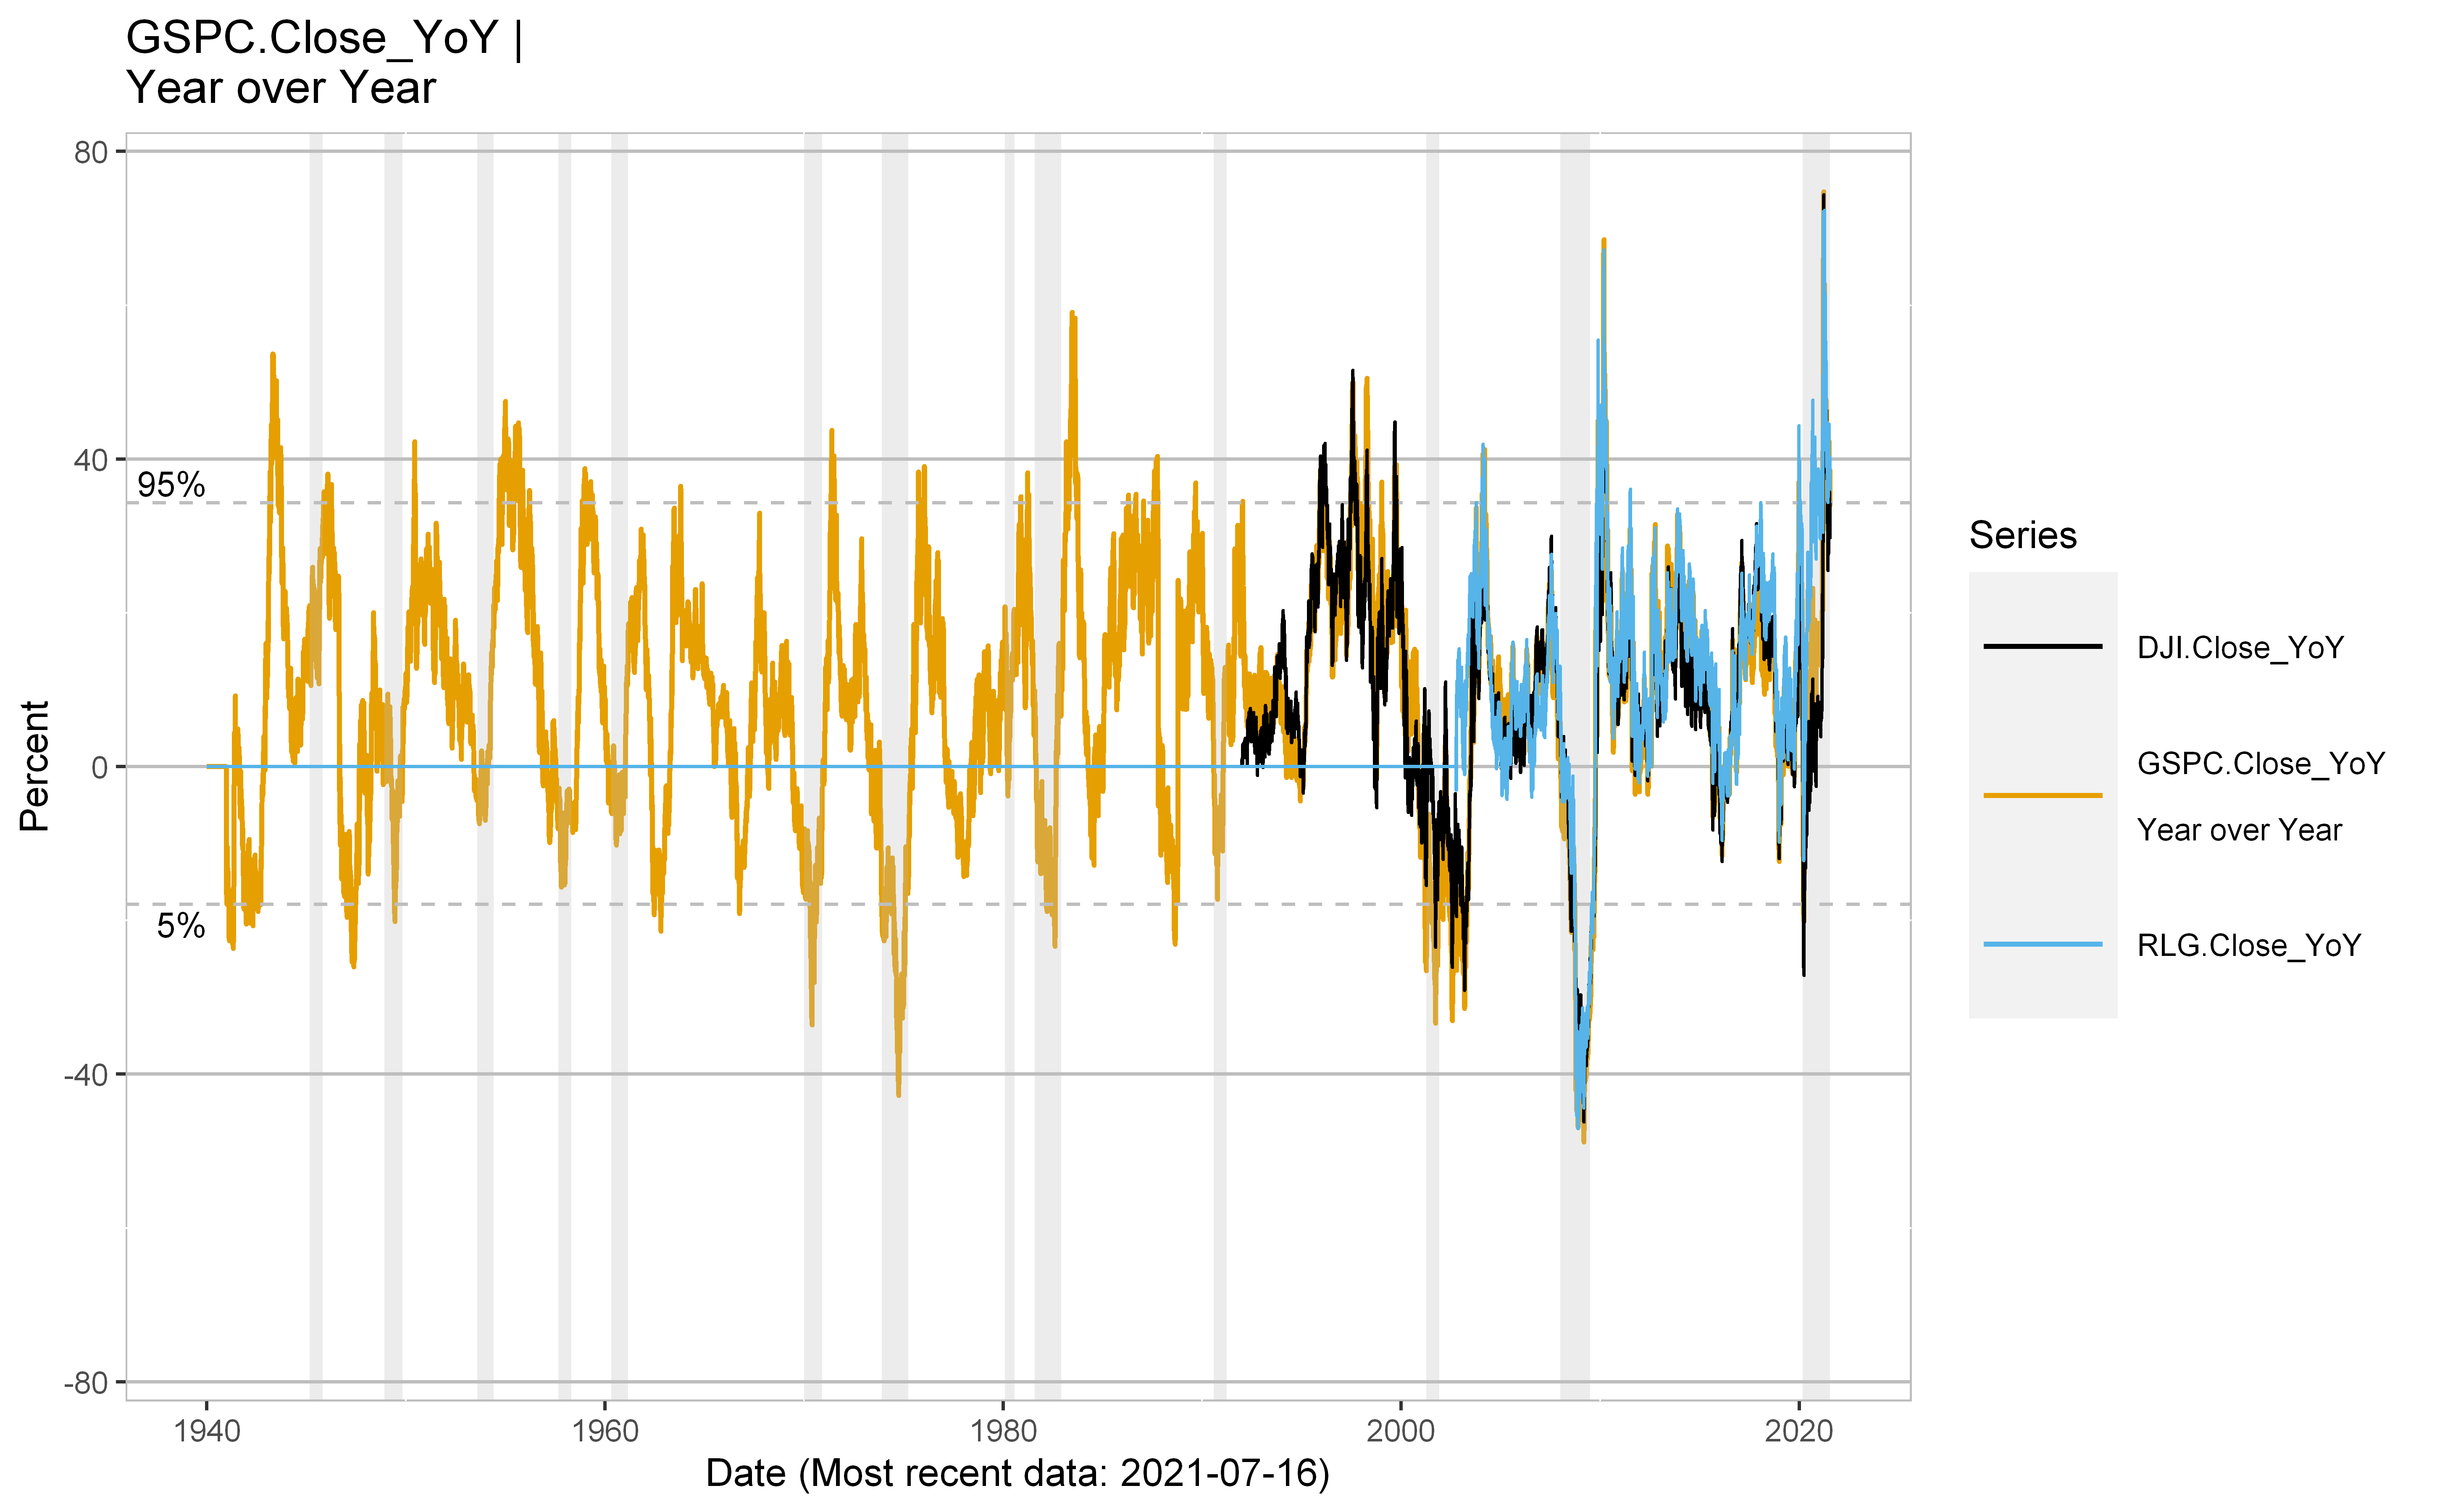

In [15]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "DJI.Close_YoY"
datay.aux.2 <- "RLG.Close_YoY"
ylim.in <- c(-75, 75)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = getPlotTitle(df.symbols, datay.in),
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

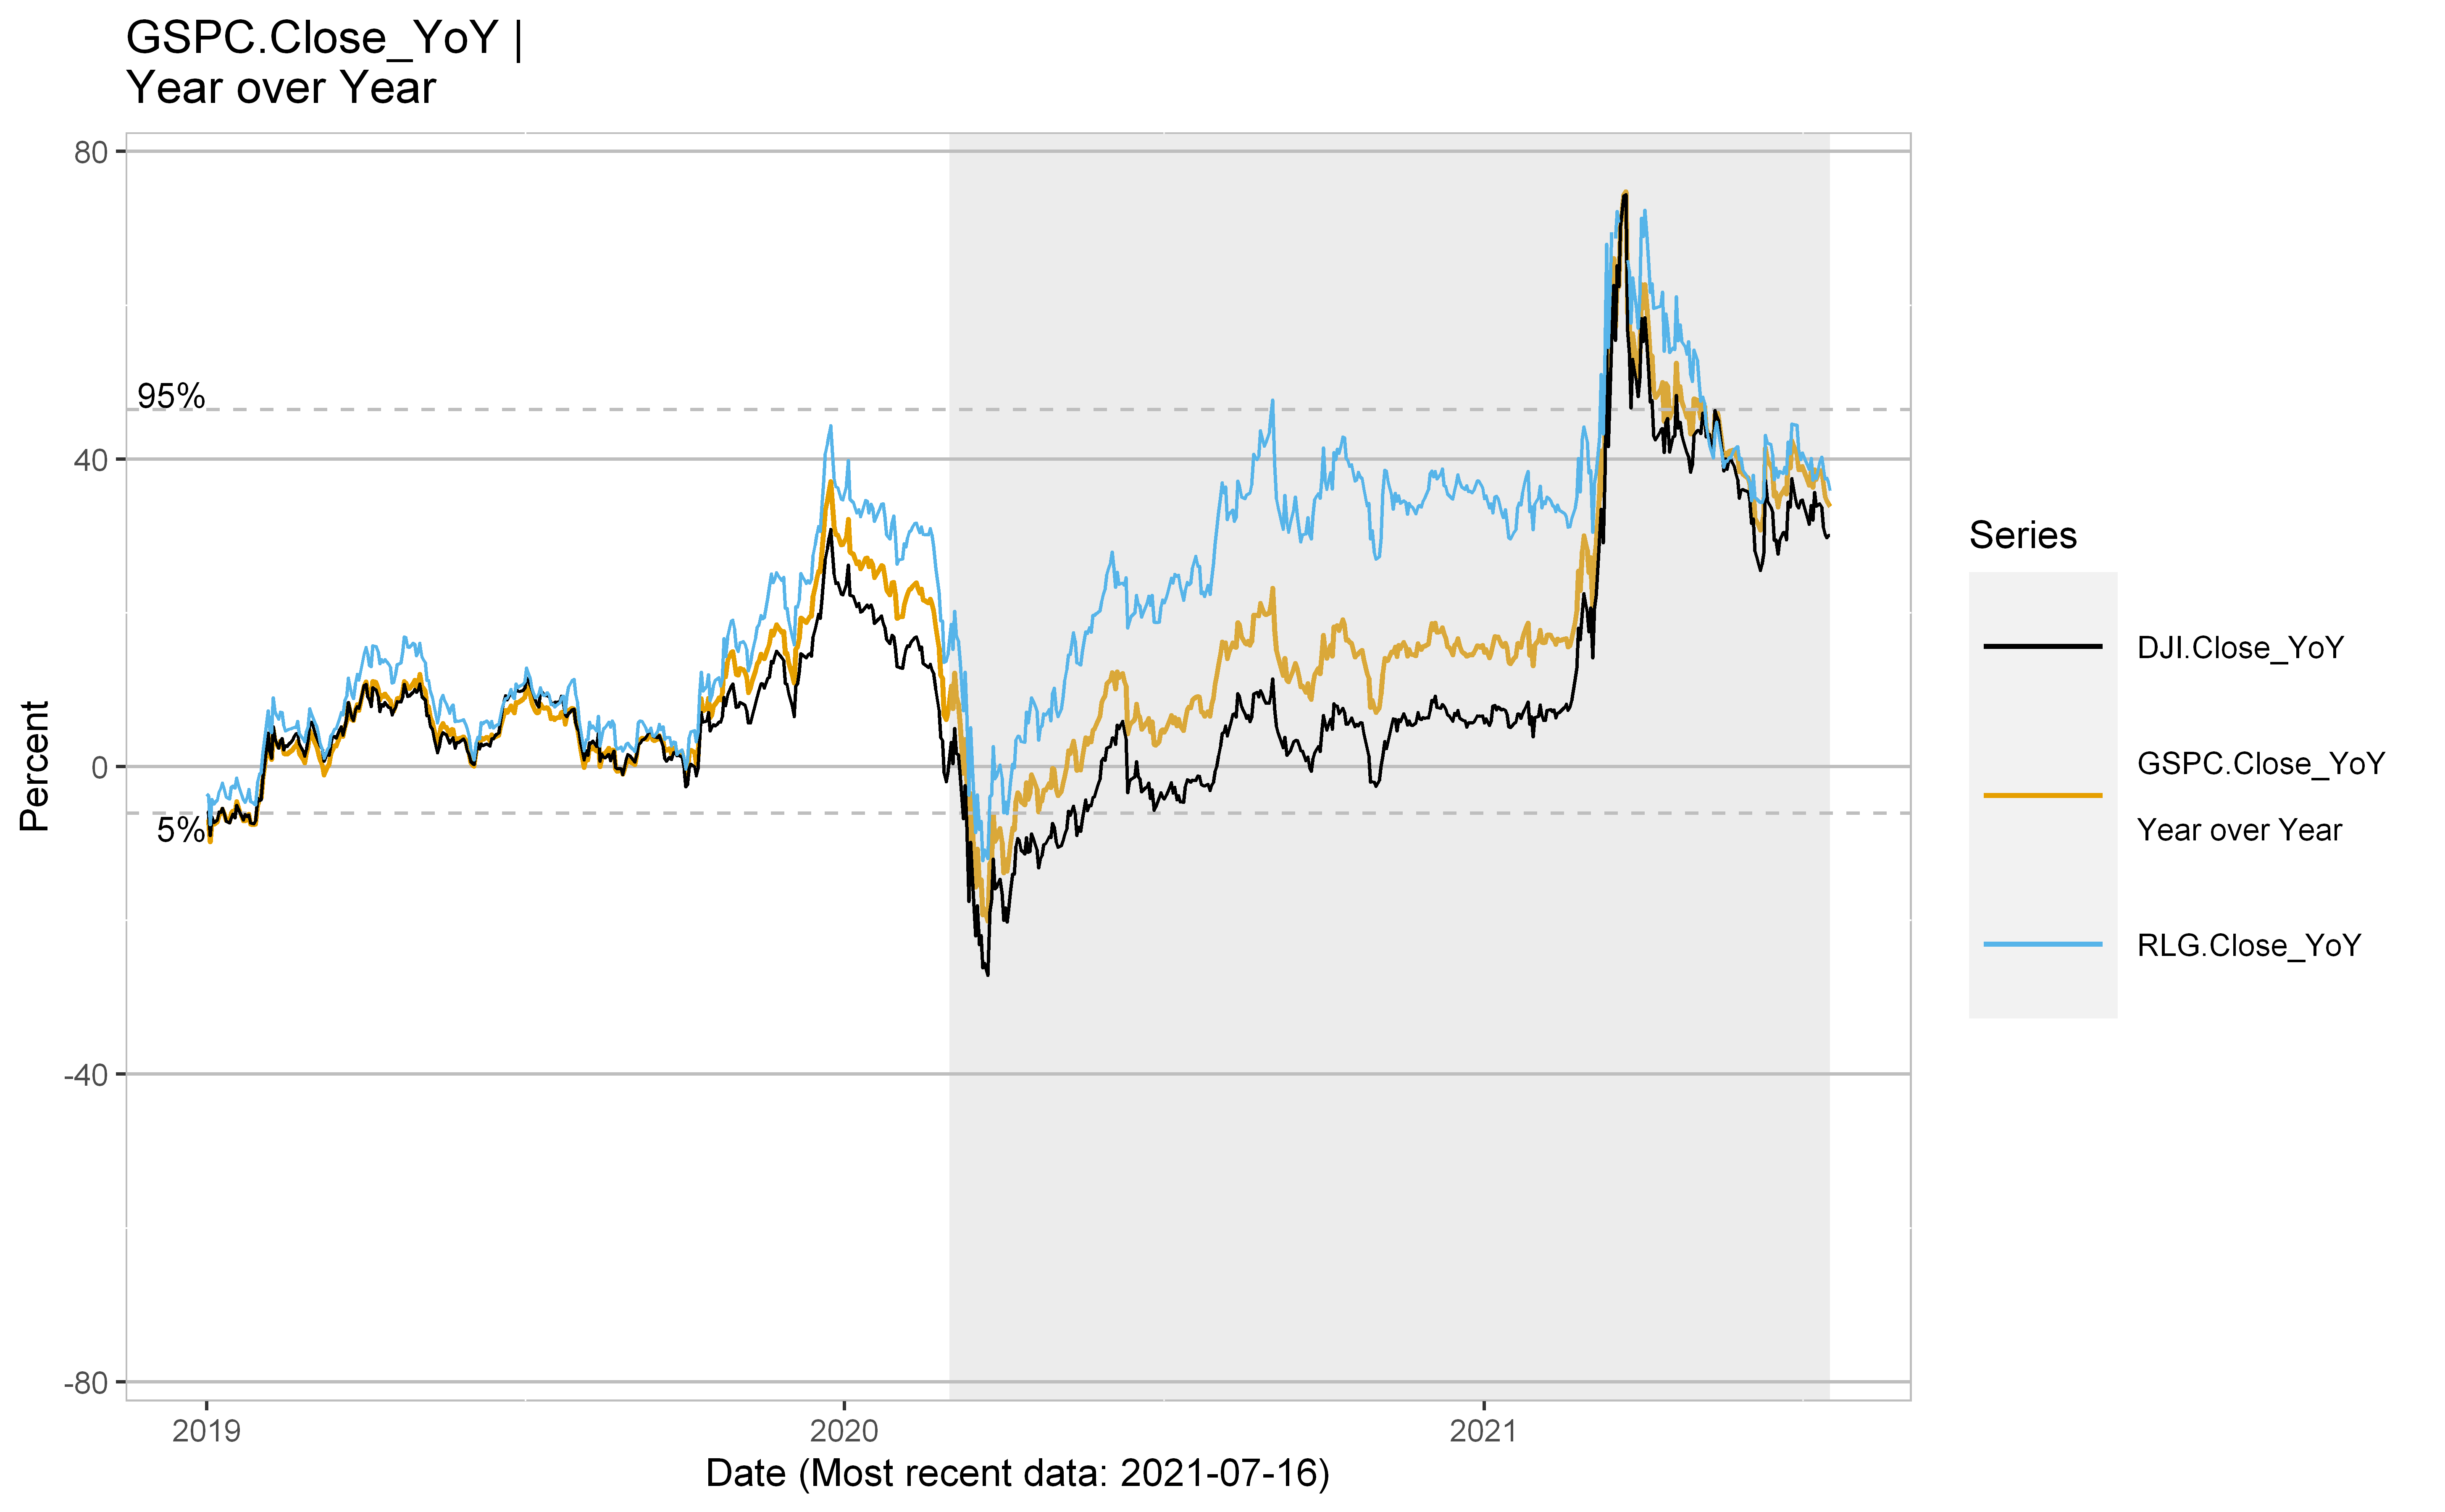

In [16]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "DJI.Close_YoY"
datay.aux.2 <- "RLG.Close_YoY"
ylim.in <- c(-75, 75)
dt.start <- as.Date('2019-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = getPlotTitle(df.symbols, datay.in),
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

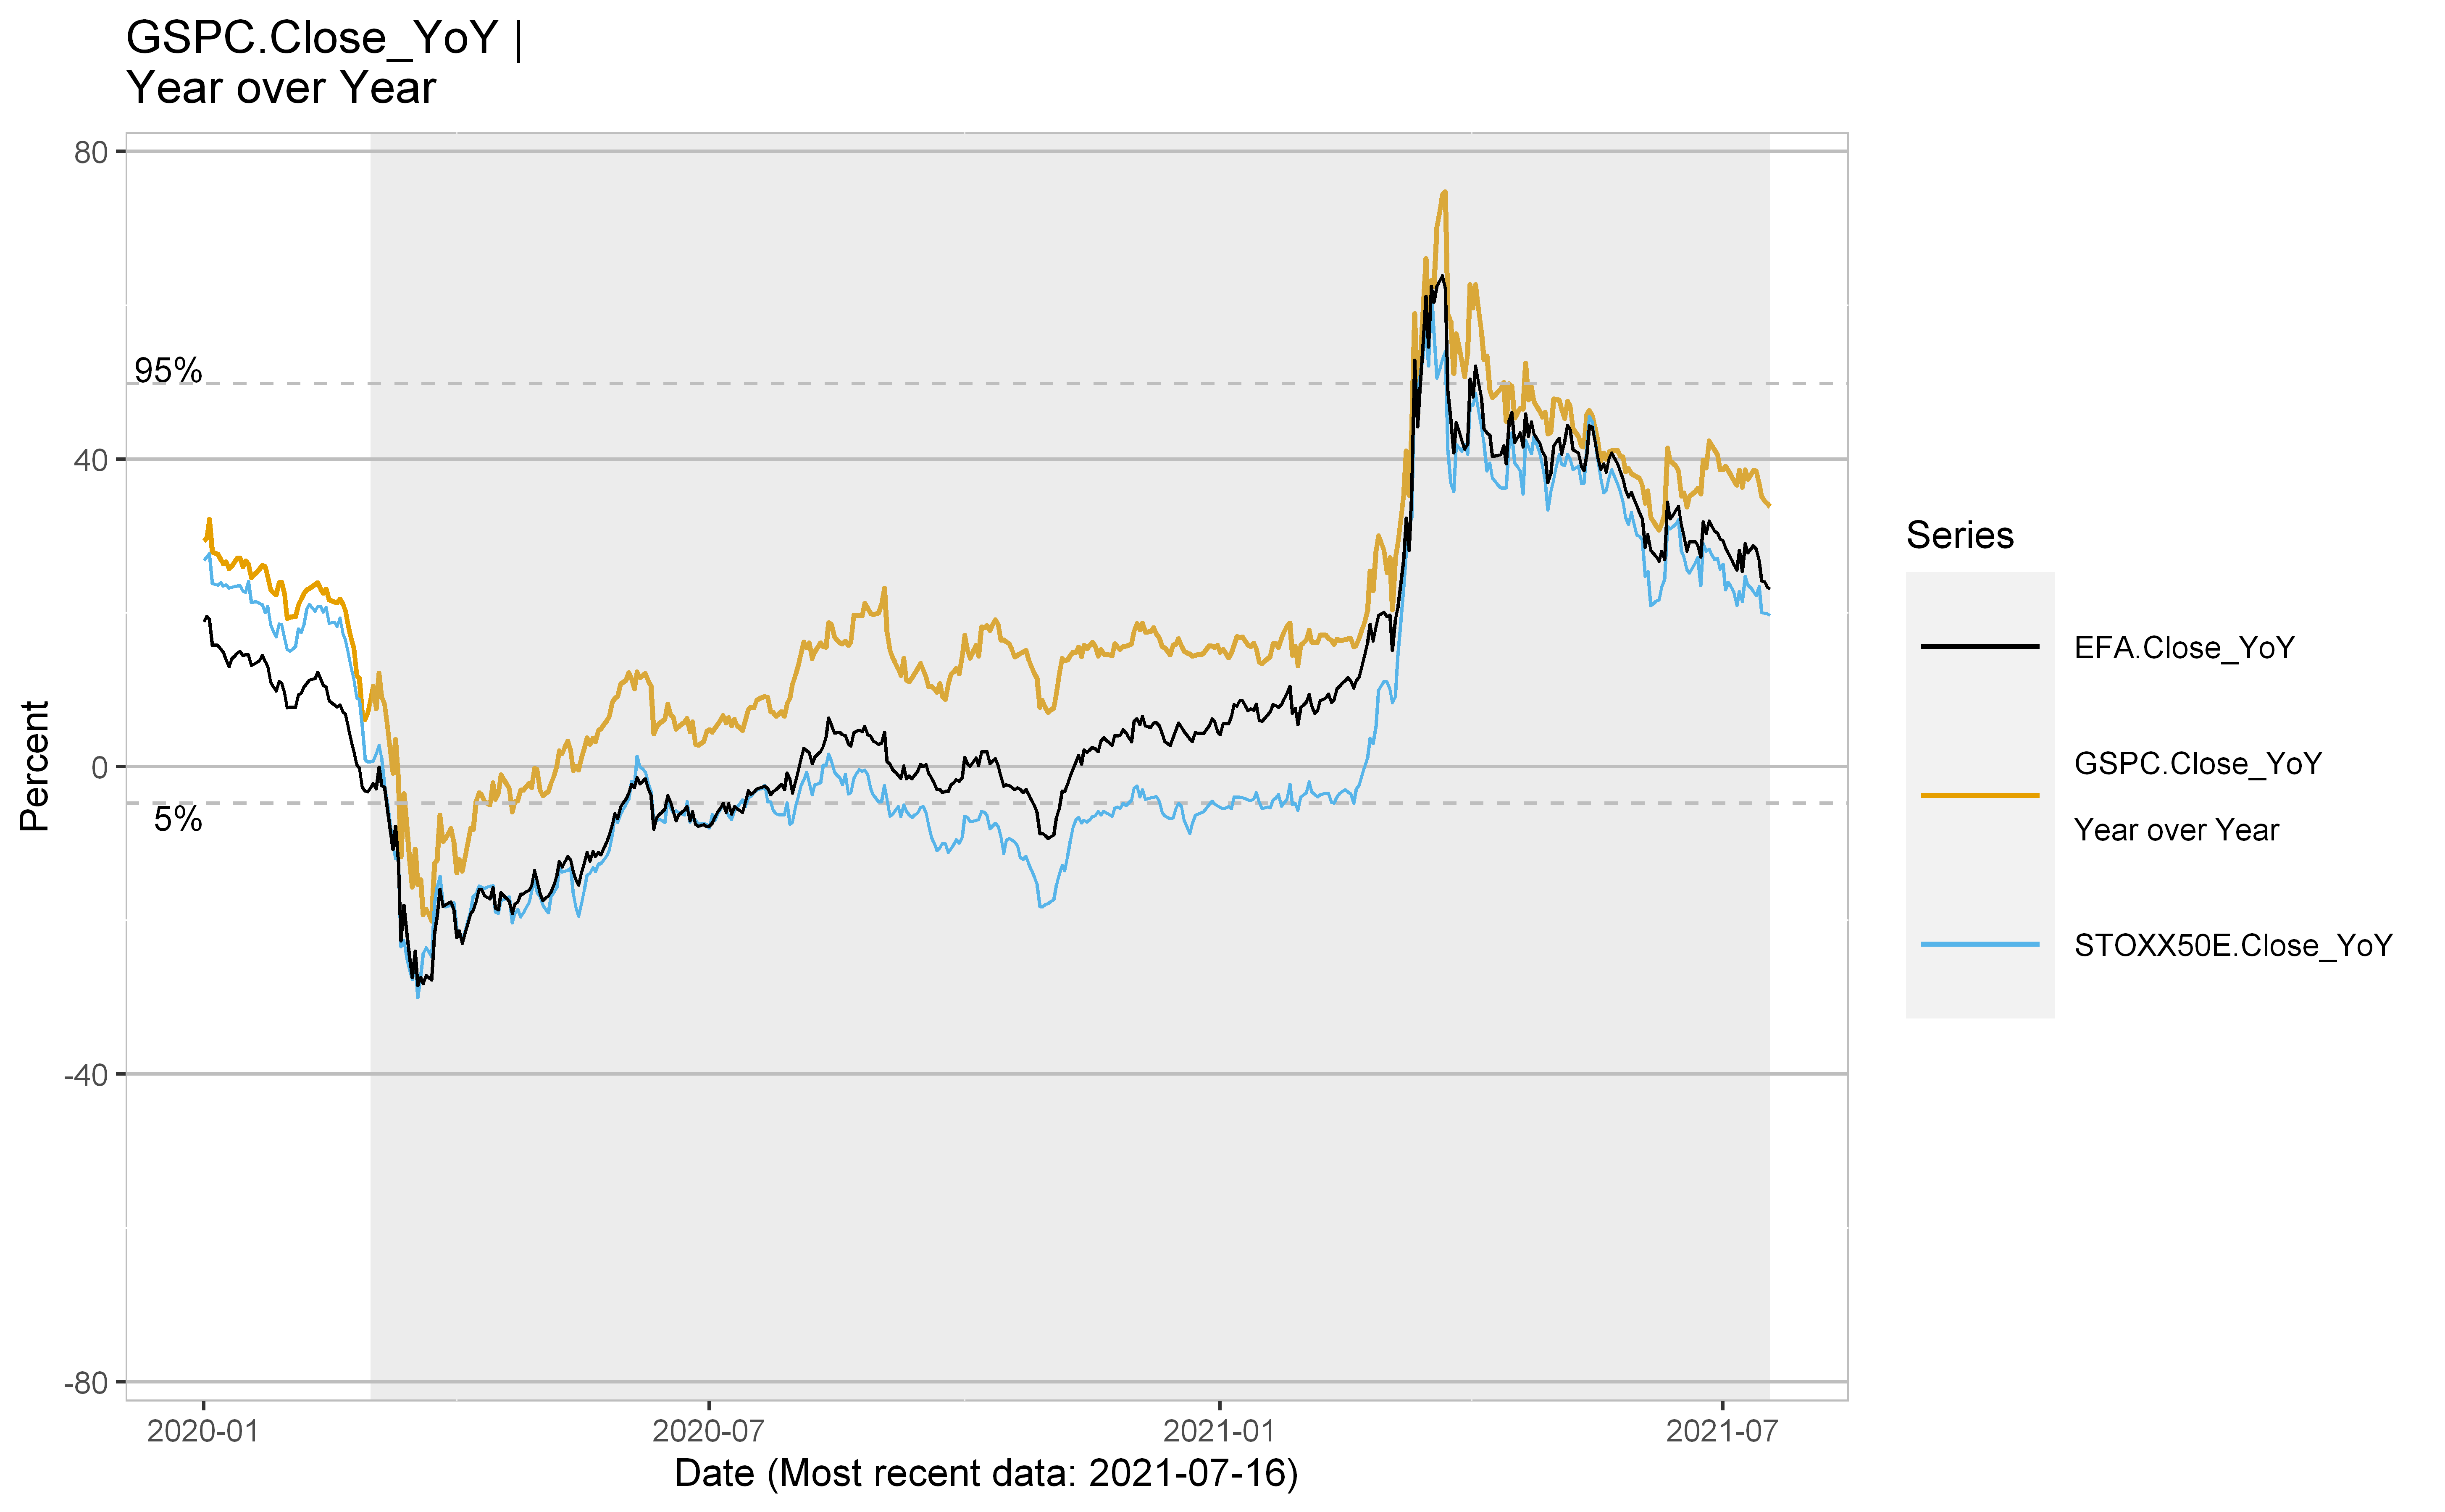

In [17]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "STOXX50E.Close_YoY"
datay.aux.2 <- "EFA.Close_YoY"
ylim.in <- c(-75, 75)
dt.start <- as.Date('2020-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = getPlotTitle(df.symbols, datay.in),
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

## Historical Returns

### US Equity


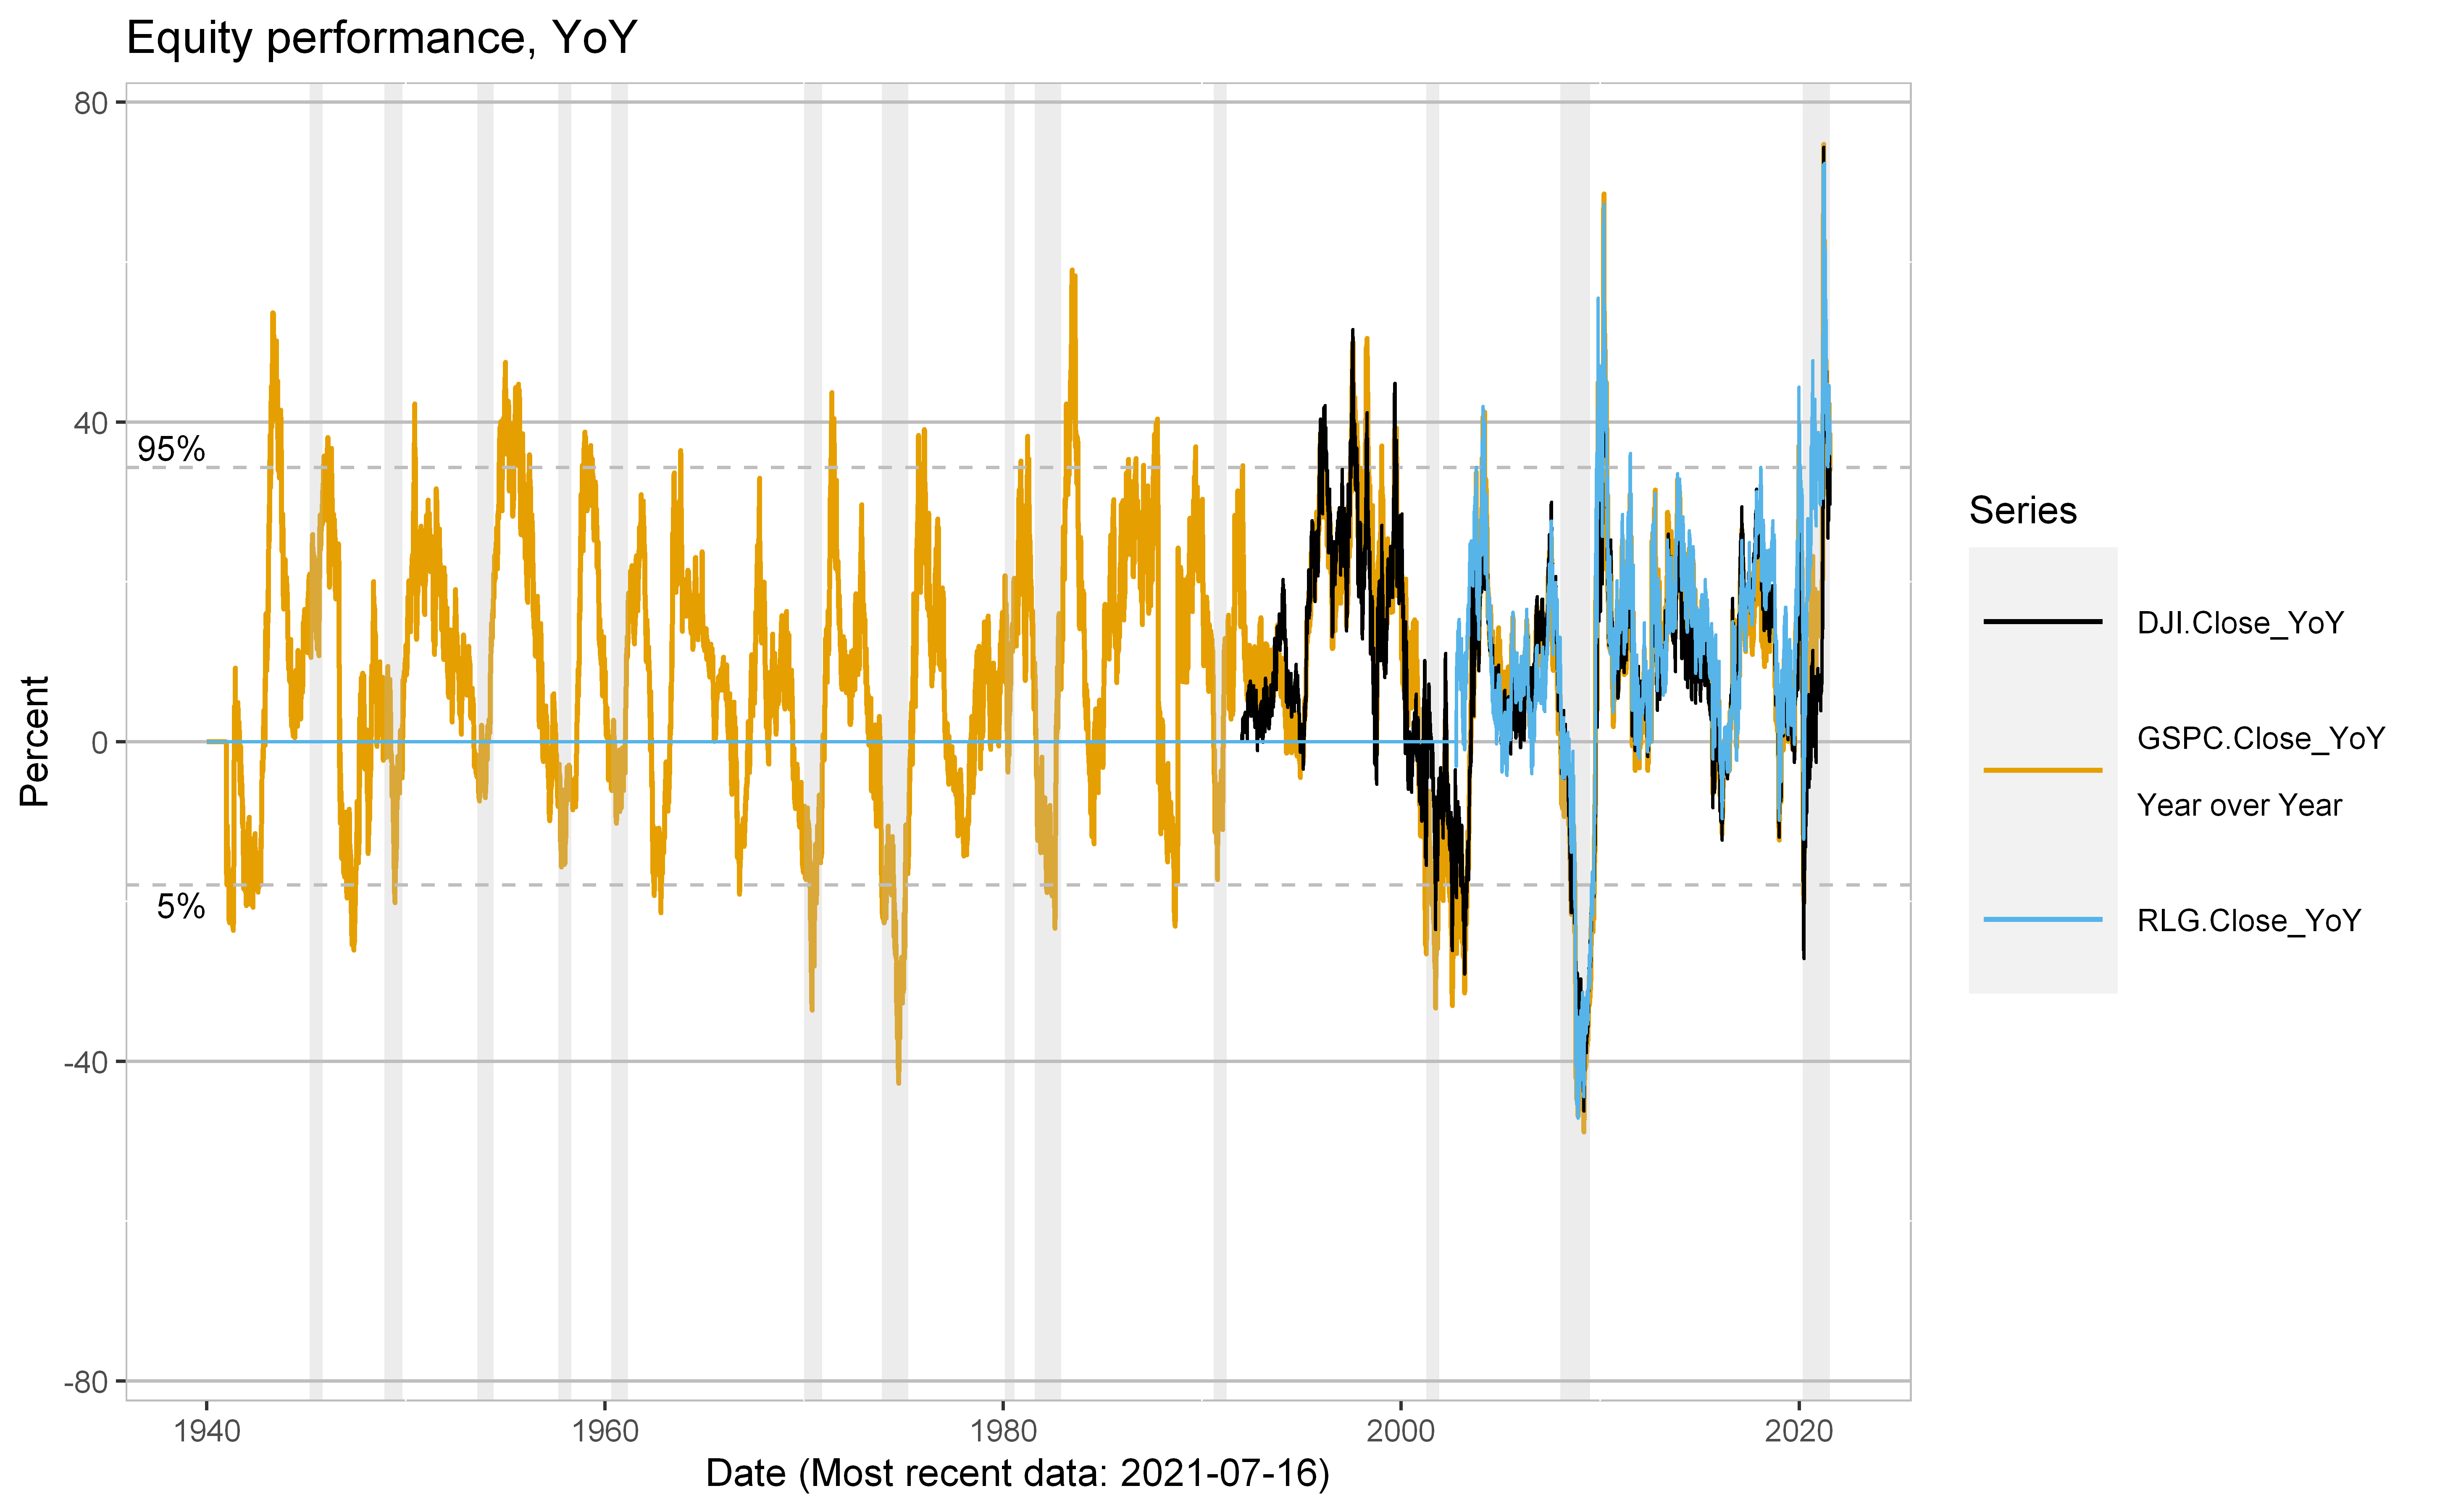

In [18]:
options(repr.plot.width = 9.7, repr.plot.height = 6, repr.plot.res = 600)
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "DJI.Close_YoY"
datay.aux.2 <- "RLG.Close_YoY"
ylim.in <- c(-75, 75)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "Equity performance, YoY",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

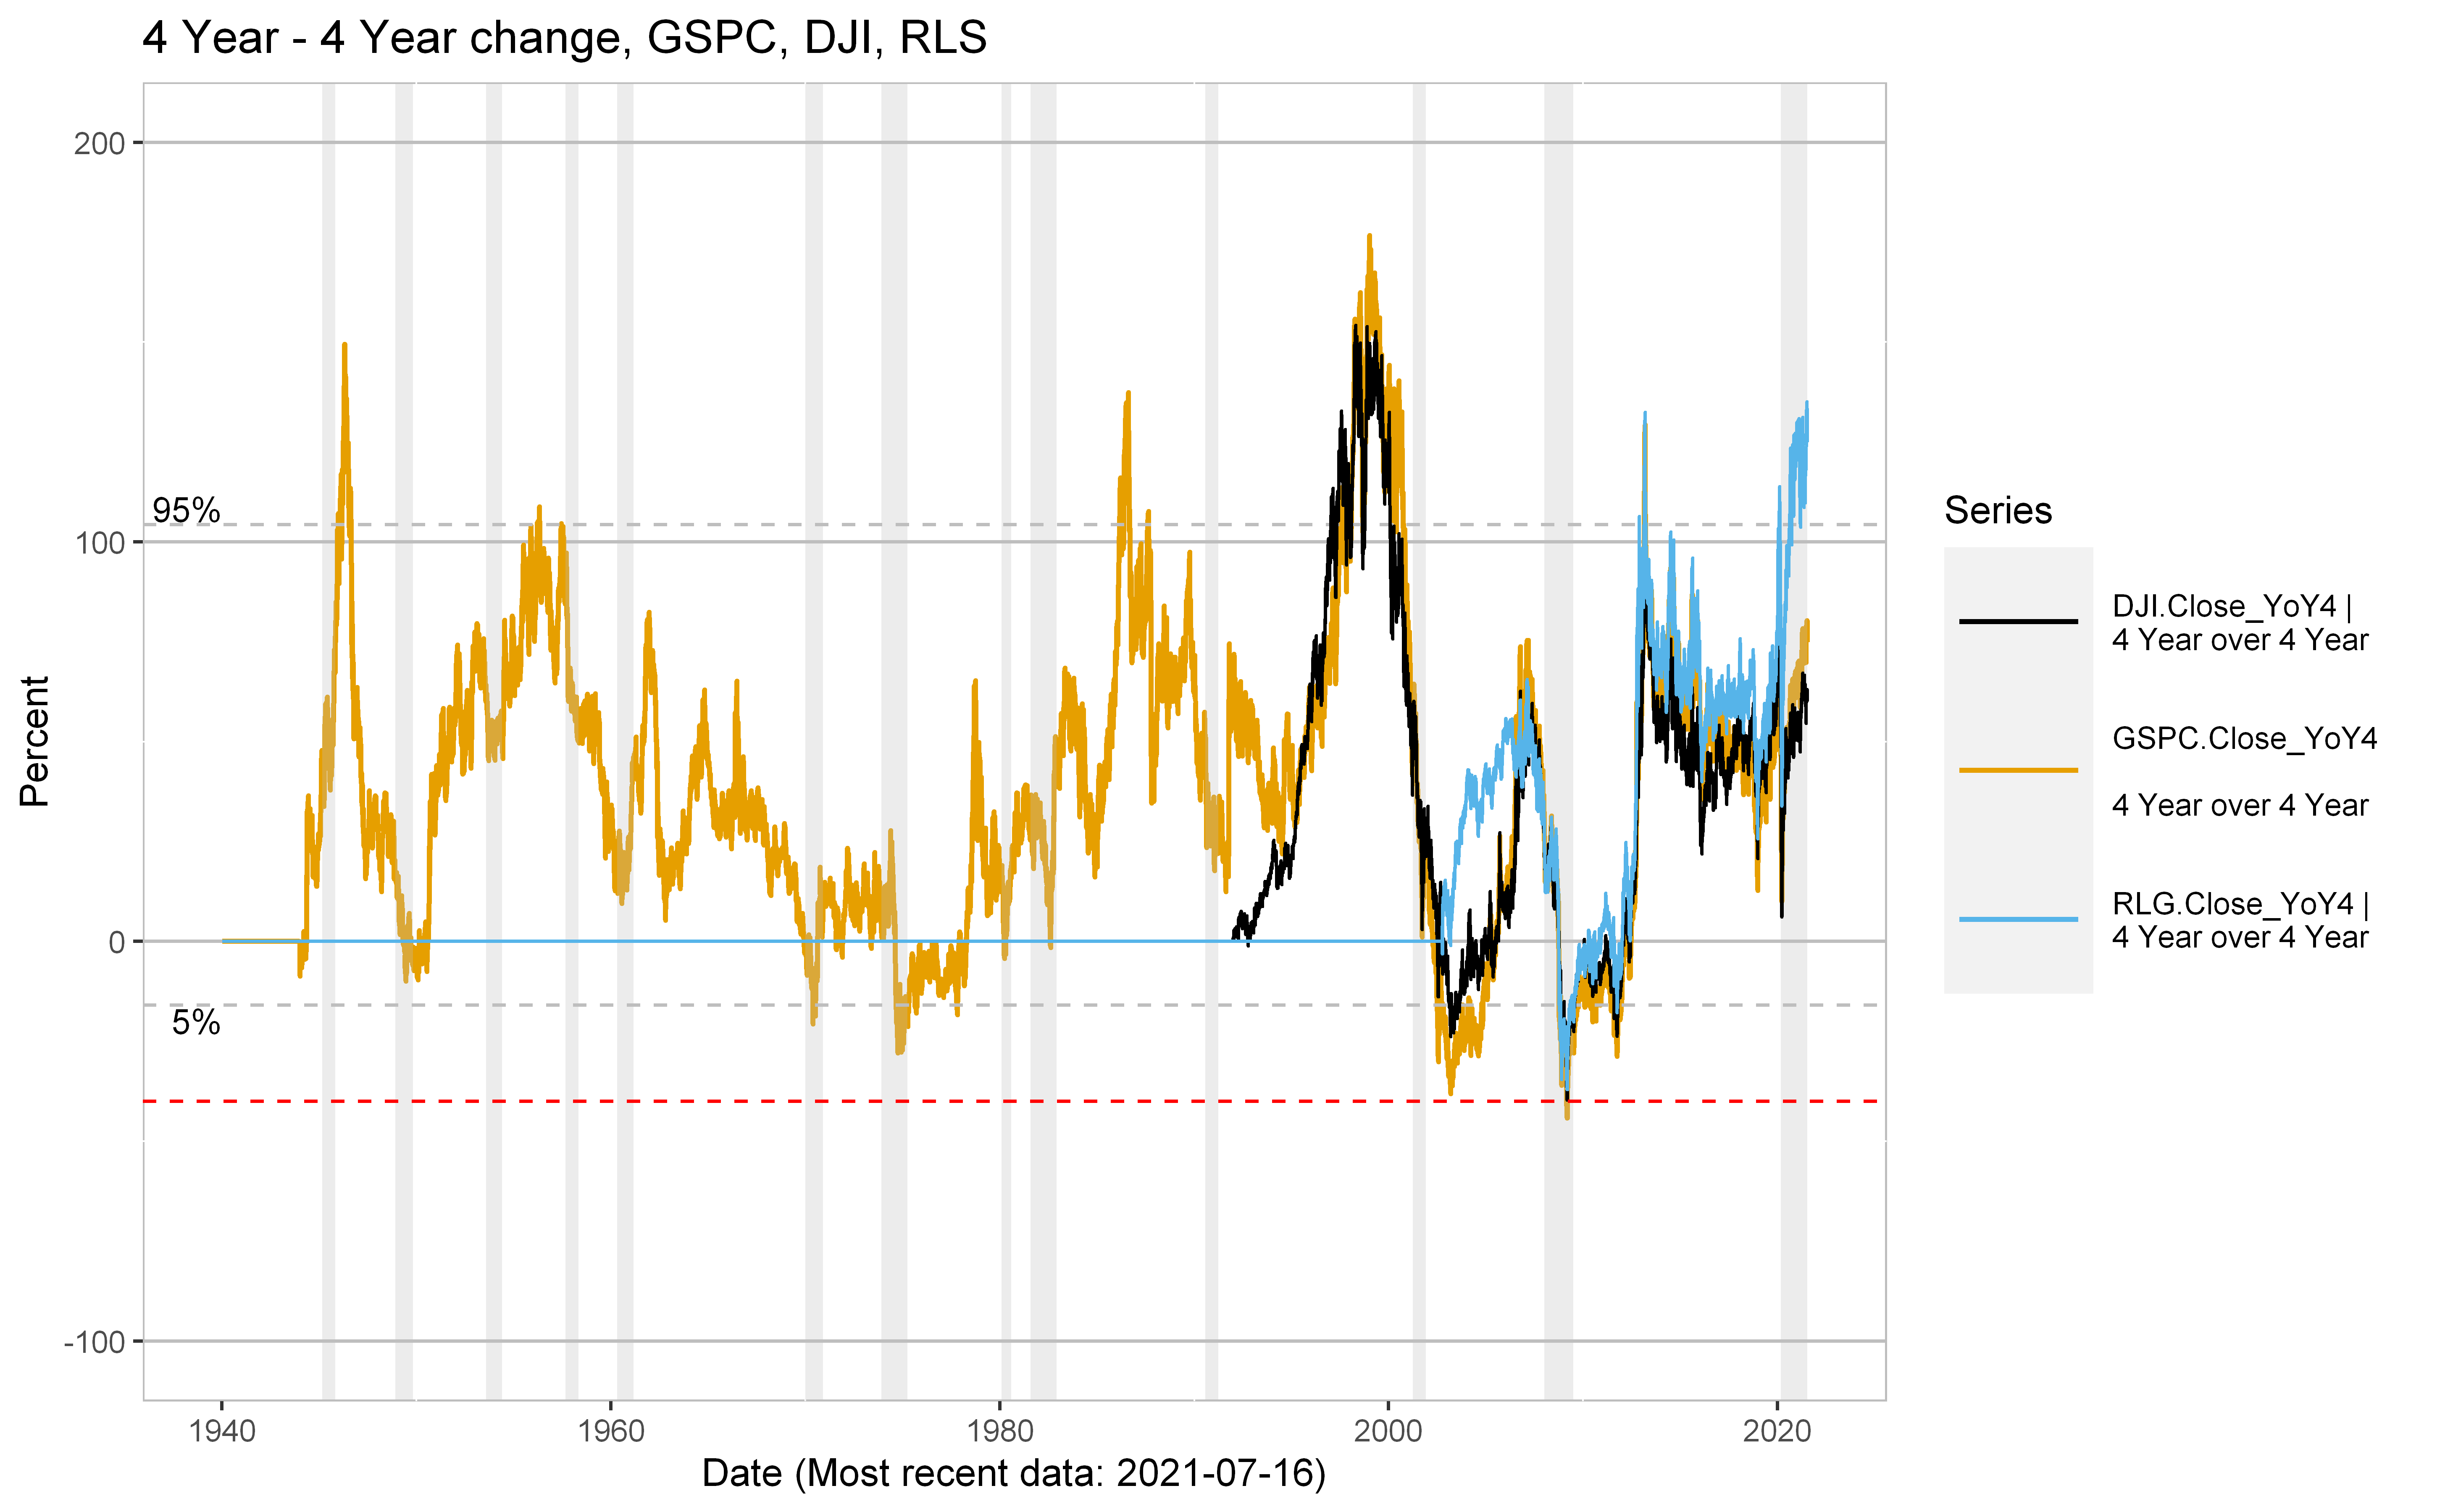

In [19]:
datay.in <- "GSPC.Close_YoY4"
datay.aux.1 <- "DJI.Close_YoY4"
datay.aux.2 <- "RLG.Close_YoY4"
ylim.in <- c(-100, 200)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "4 Year - 4 Year change, GSPC, DJI, RLS",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.1))
  ),
  na.rm = TRUE
)
p1 <- p1 + geom_hline(yintercept = -40,
                      linetype = "dashed",
                      color = "red")
p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.2))
  ),
  na.rm = TRUE
)

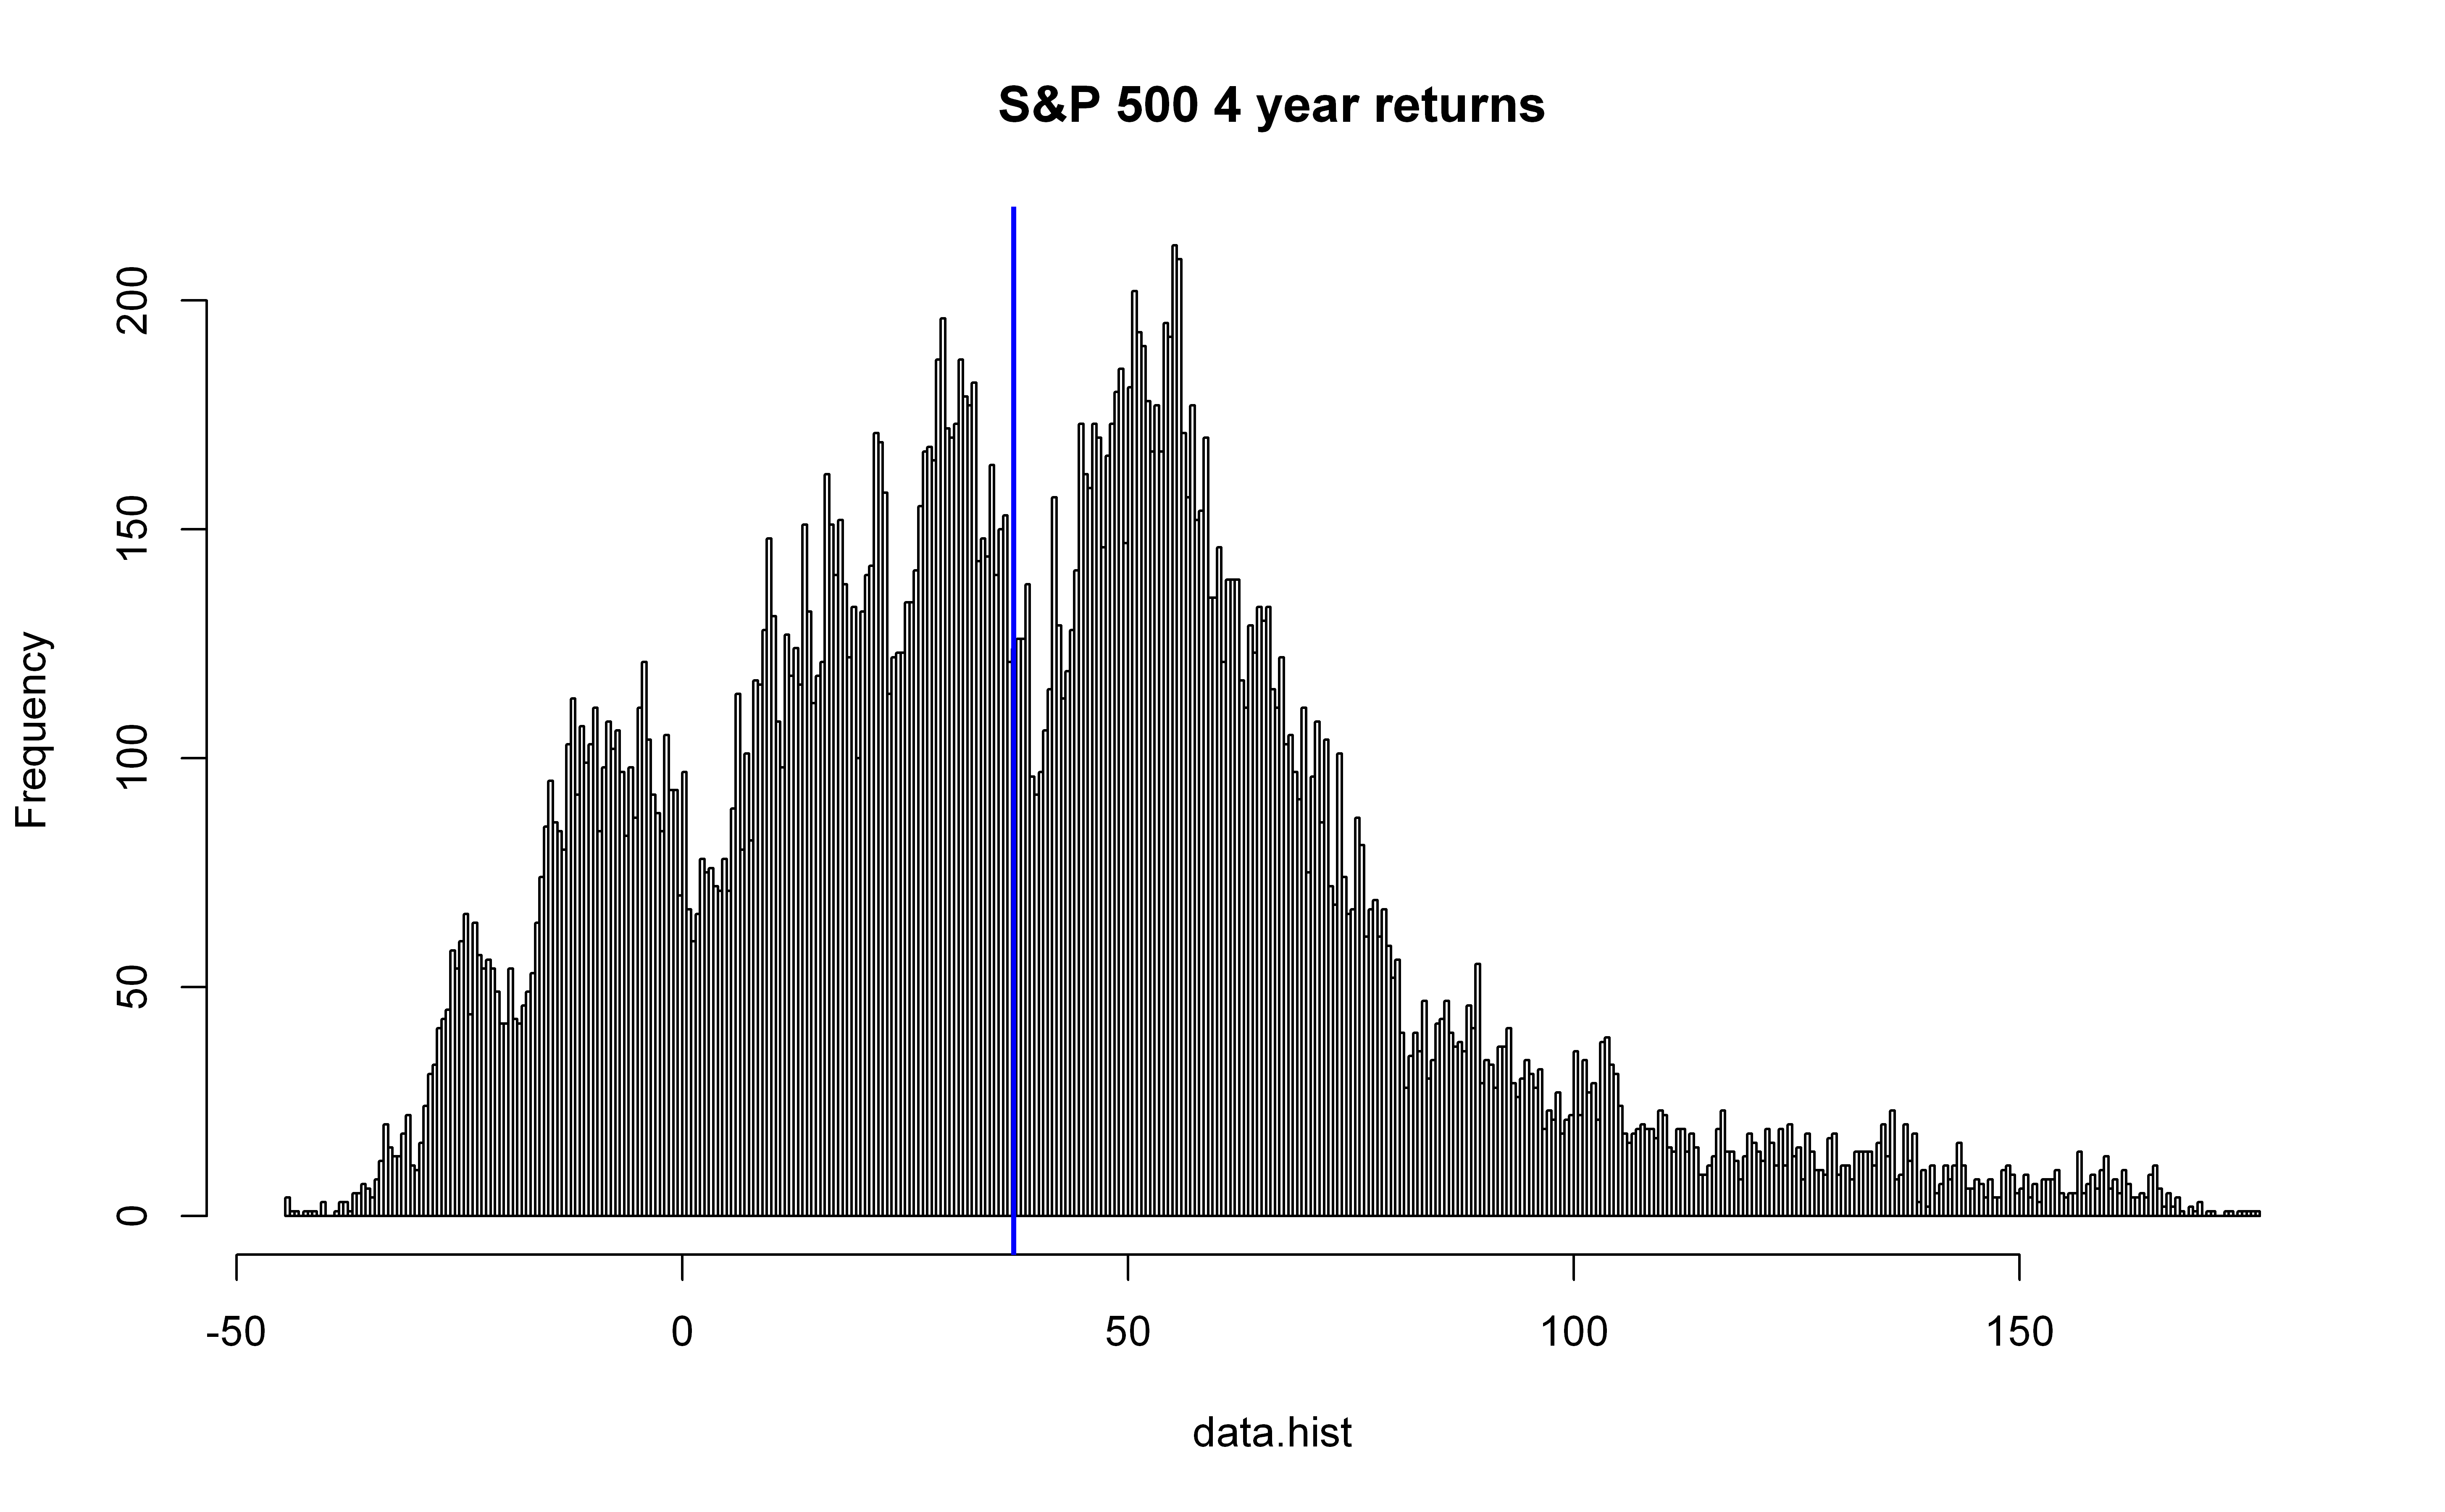

In [20]:
data.hist <- df.data$GSPC.Close_YoY4[df.data$date>dt.start]
data.hist <- data.hist[abs(data.hist)>0]
my.h <- hist(data.hist,breaks=500,main="S&P 500 4 year returns")
abline(v = median(data.hist), col = "blue", lwd = 2)
my.h$counts=100*my.h$counts/sum(my.h$counts)

Really interested in how likely a 40% decline is 4 years after a peak

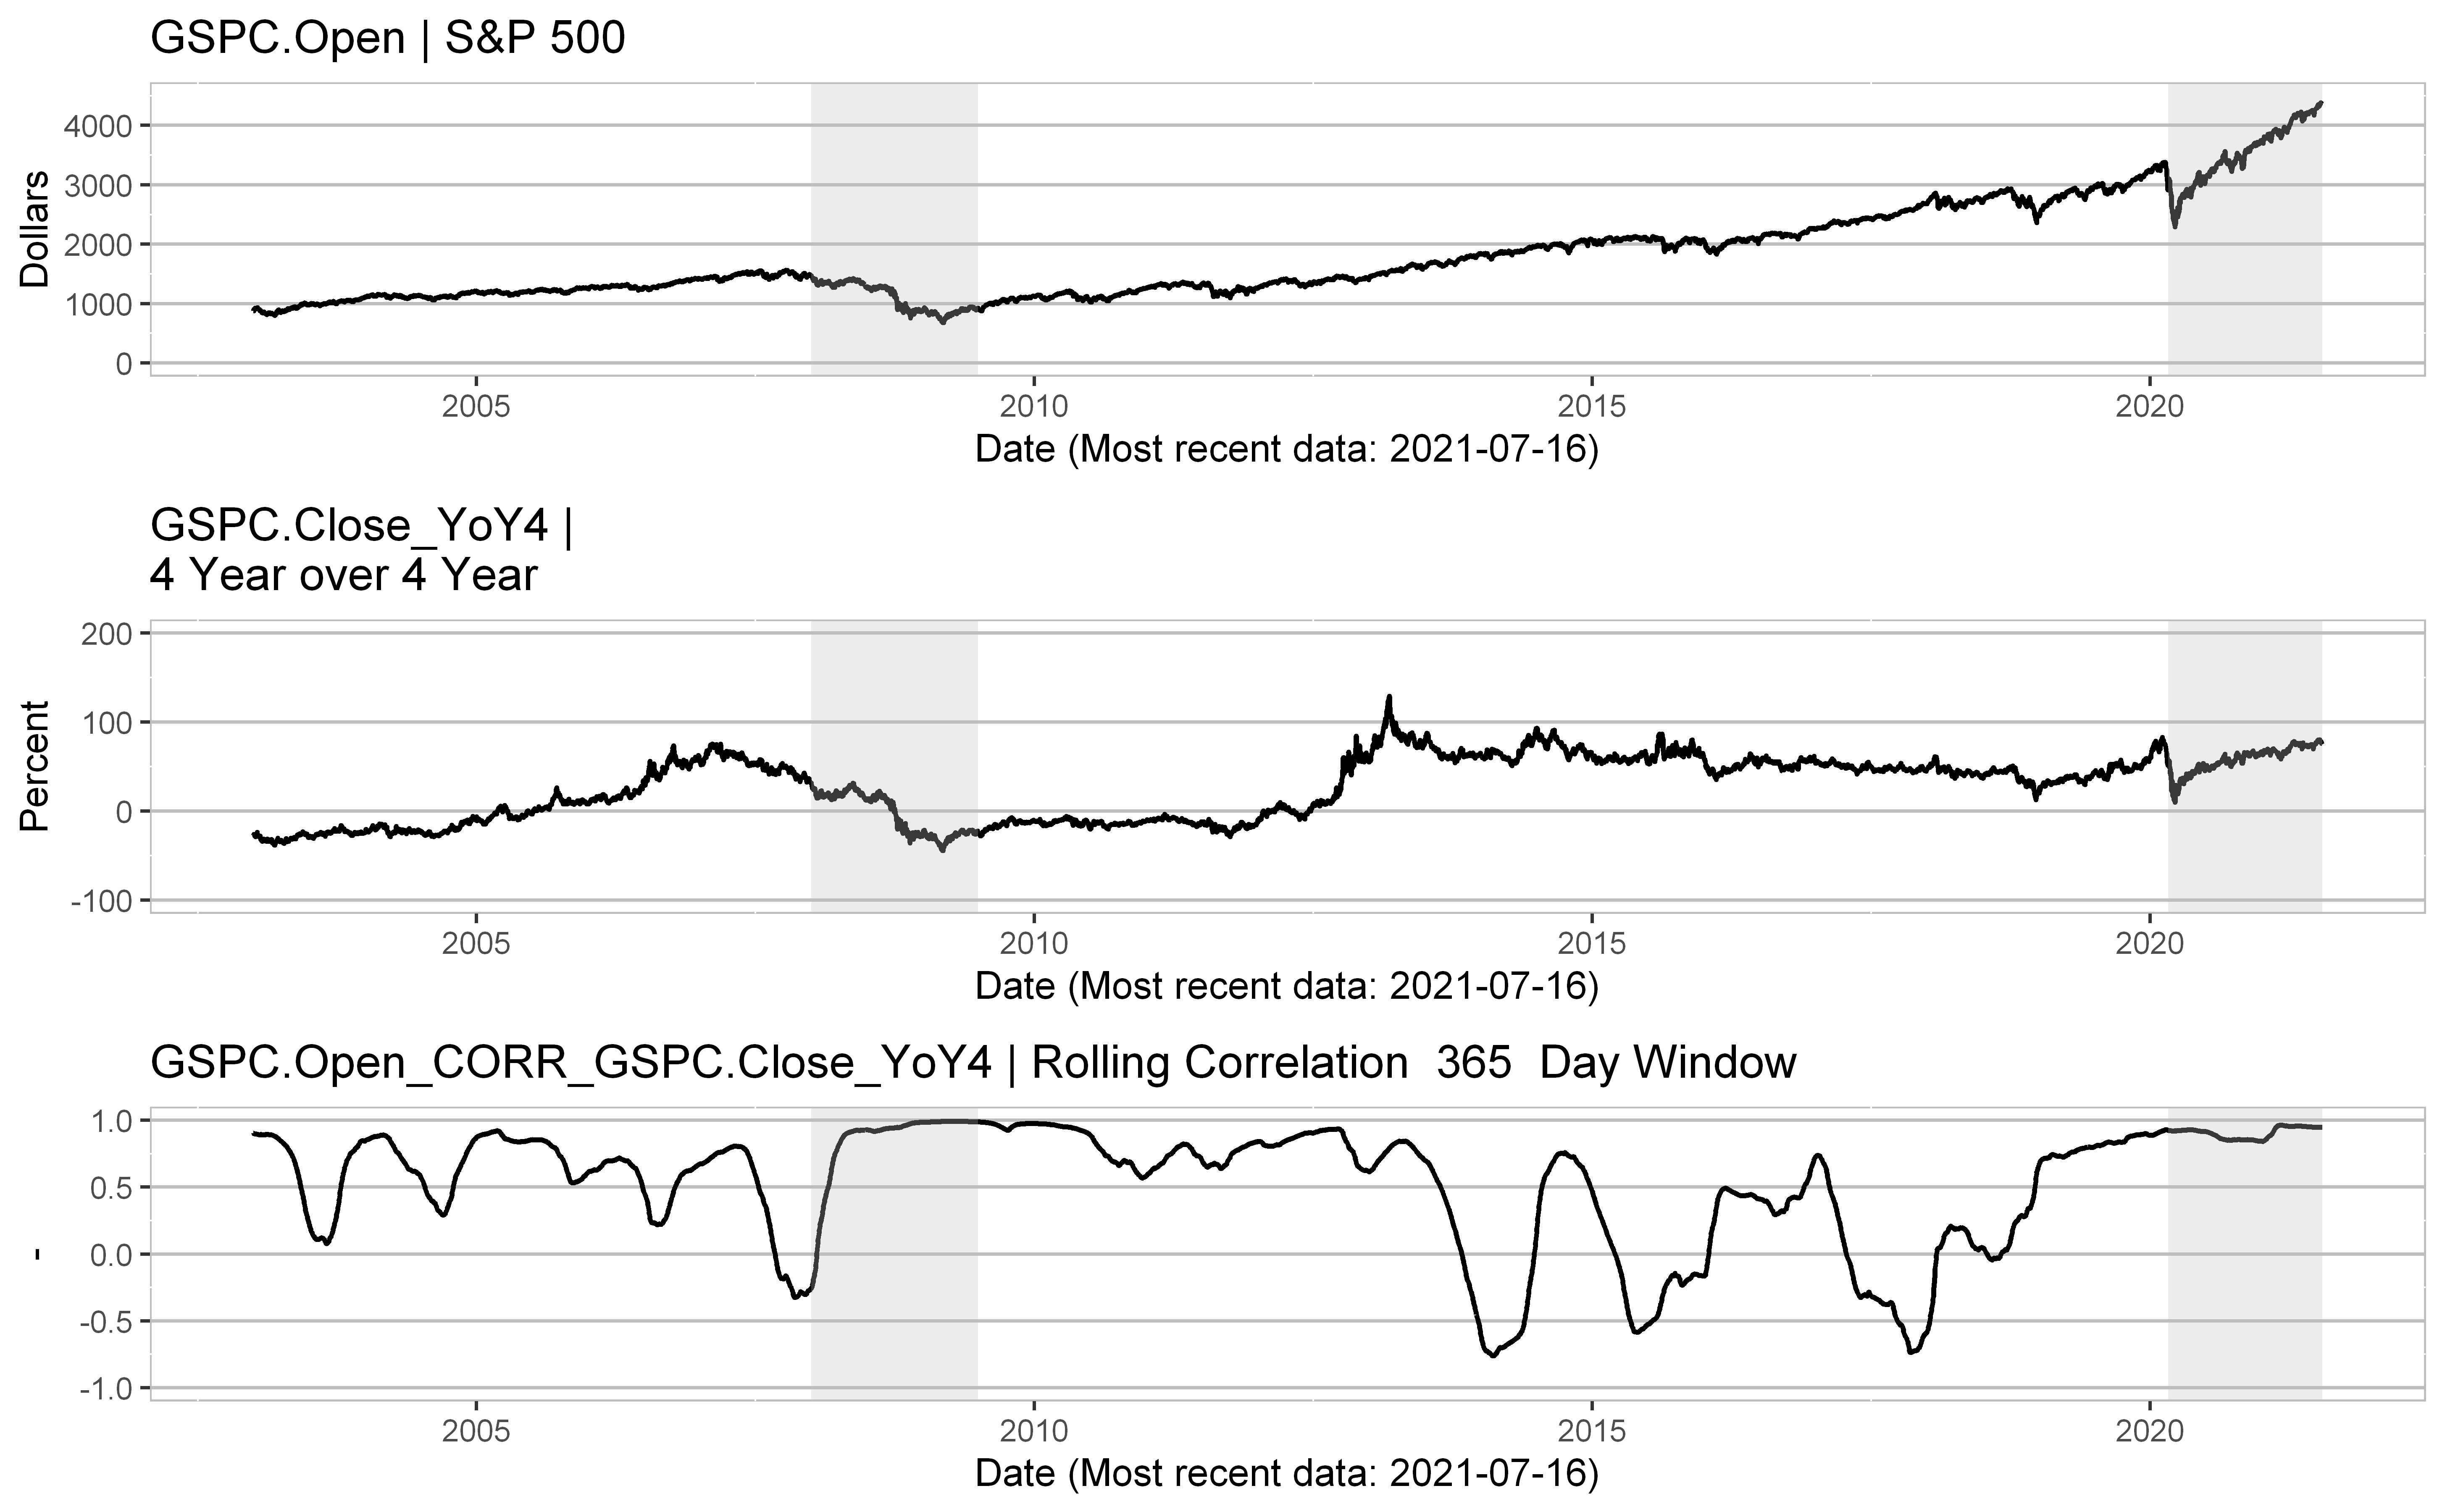

In [21]:
datay1 <- "GSPC.Open"
ylim1 <- c(0, d.GSPC.max)

datay2 <- "GSPC.Close_YoY4"
ylim2 <- c(-100, 200)

dtStart <- as.Date("1jan2003","%d%b%Y")

w <- 365
corrName <- calcRollingCorr(dfRecession, df.data, df.symbols, datay1, ylim1, datay2, ylim2, w, dtStart)


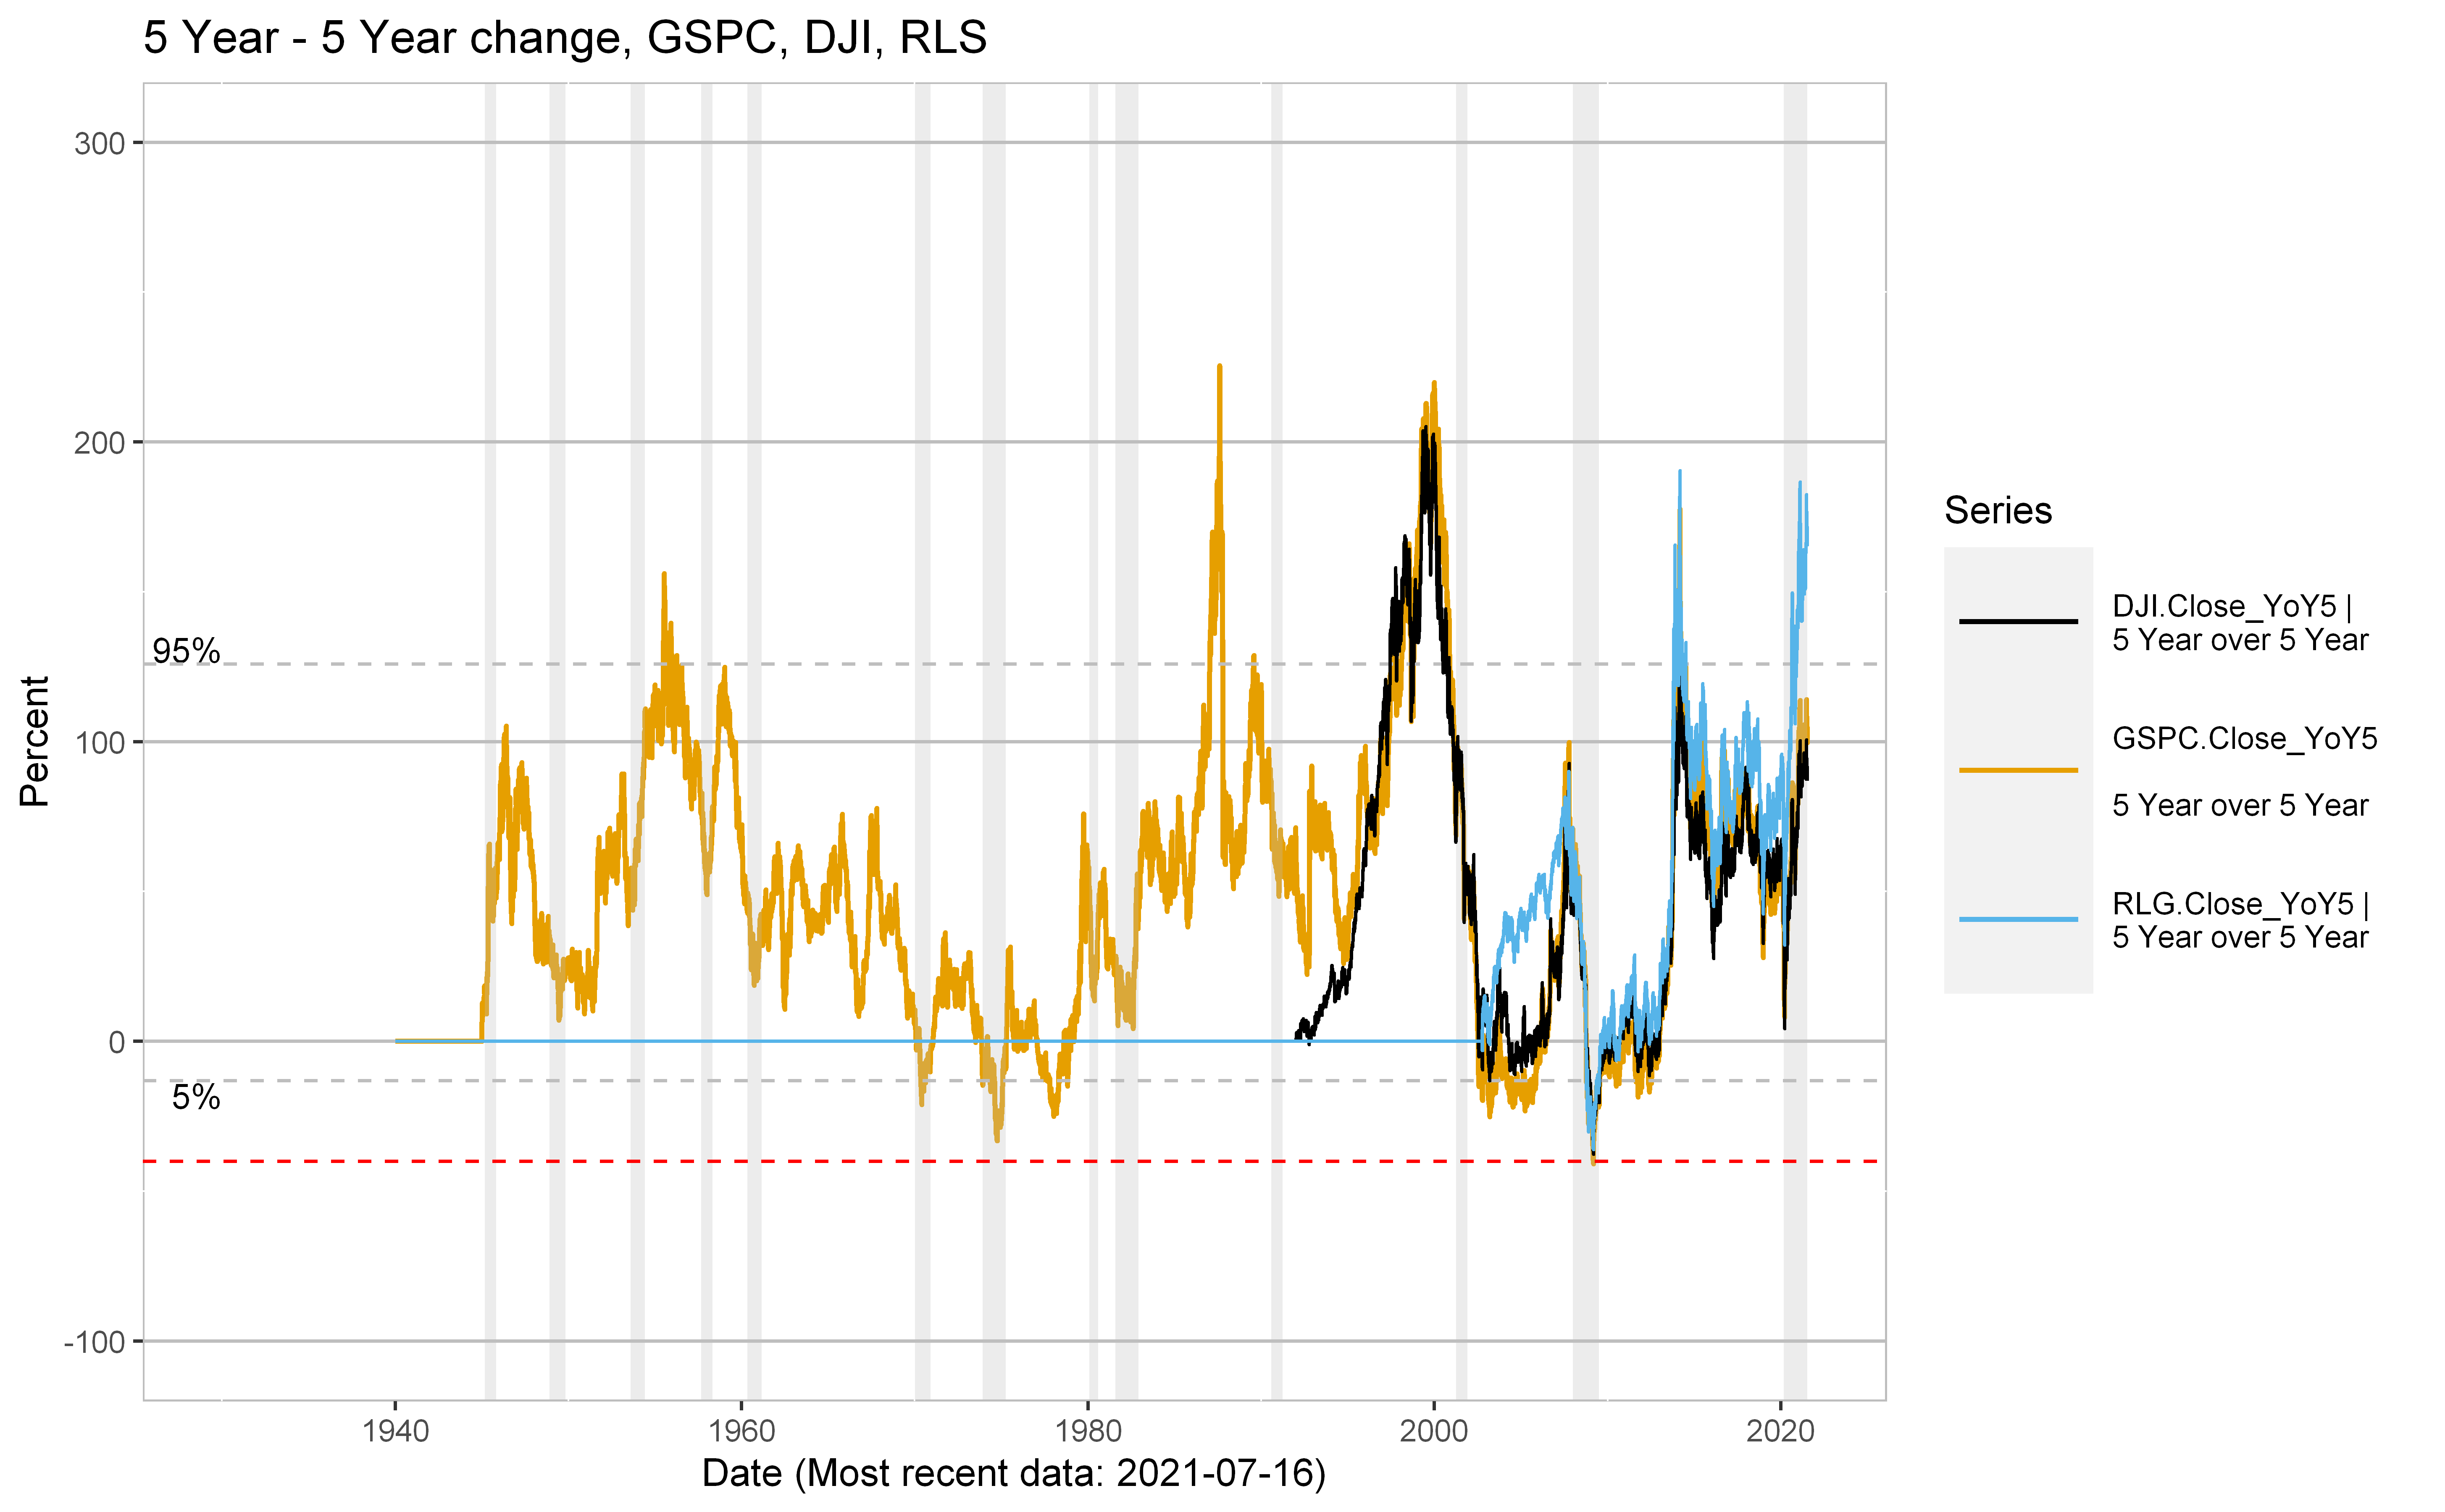

In [22]:
datay.in <- "GSPC.Close_YoY5"
datay.aux.1 <- "DJI.Close_YoY5"
datay.aux.2 <- "RLG.Close_YoY5"
ylim.in <- c(-100, 300)
dt.start <- as.Date('1930-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "5 Year - 5 Year change, GSPC, DJI, RLS",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.1,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.1))
  ),
  na.rm = TRUE
)
p1 <- p1 + geom_hline(yintercept = -40,
                      linetype = "dashed",
                      color = "red")
p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(getPlotTitle(df.symbols, datay.aux.2))
  ),
  na.rm = TRUE
)

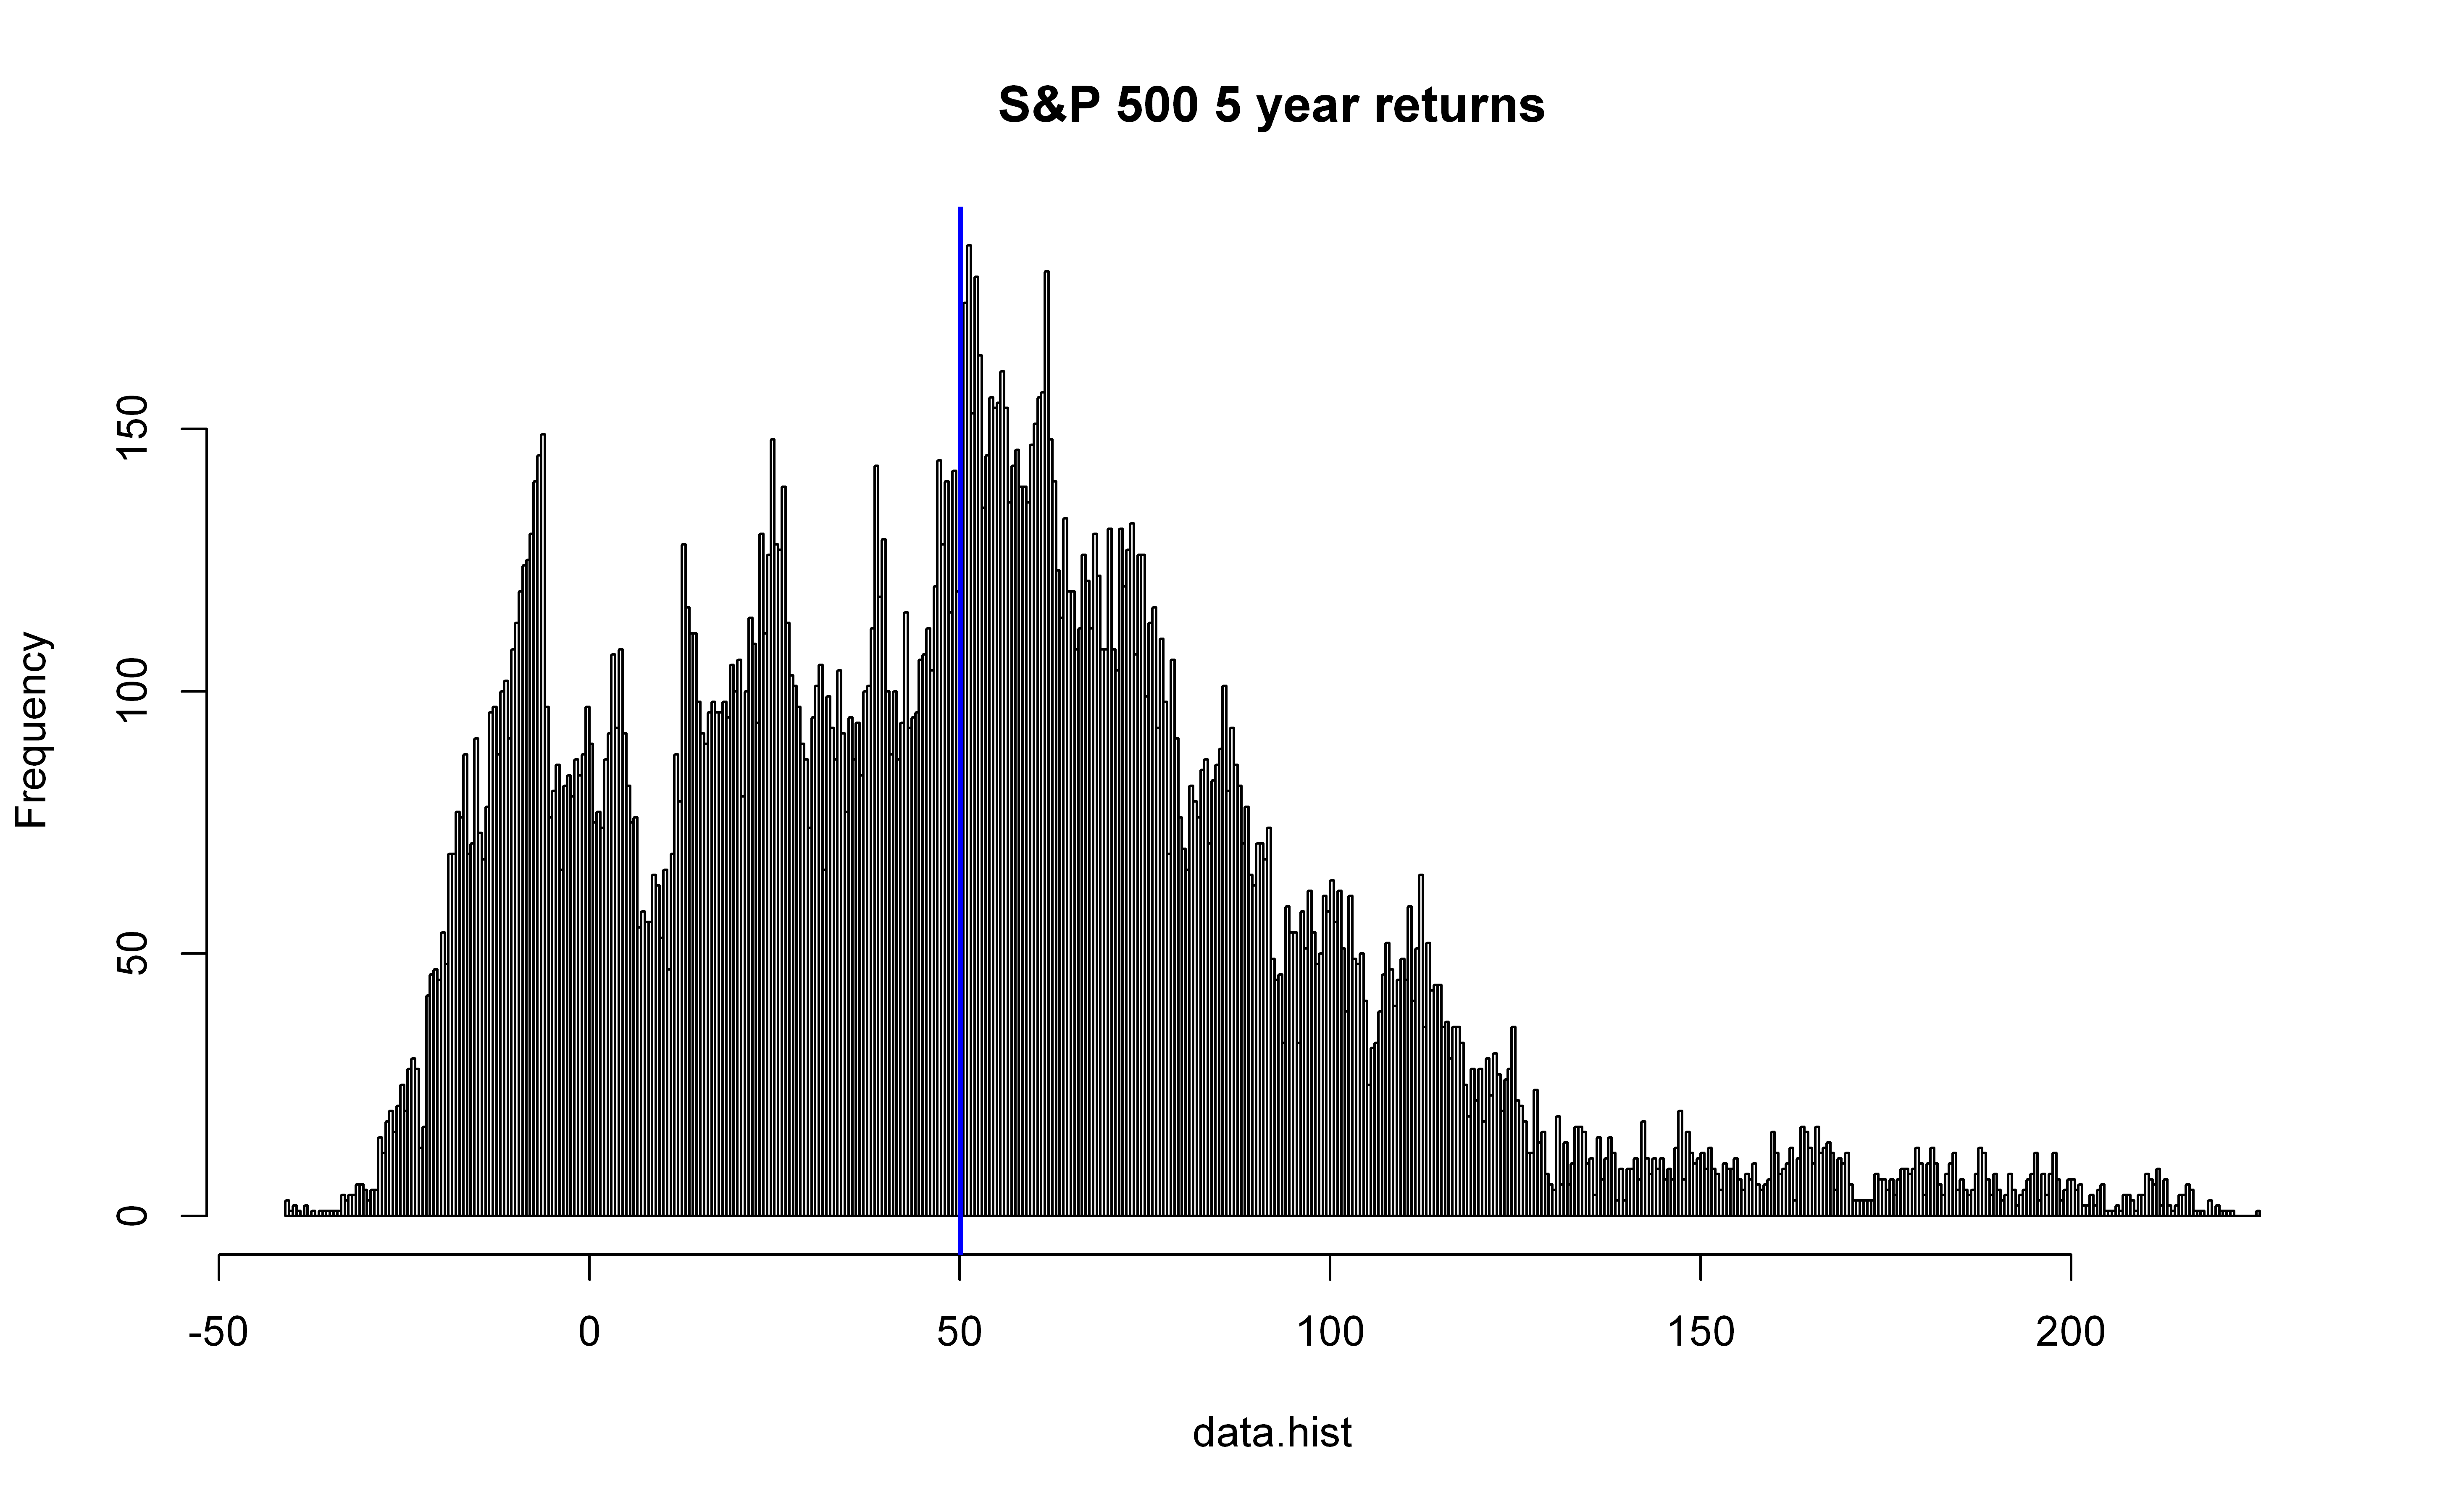

In [23]:
data.hist <- df.data$GSPC.Close_YoY5[df.data$date>dt.start]
data.hist <- data.hist[abs(data.hist)>0]
my.h <- hist(data.hist,breaks=500,main="S&P 500 5 year returns")
abline(v = median(data.hist), col = "blue", lwd = 2)
my.h$counts=100*my.h$counts/sum(my.h$counts)

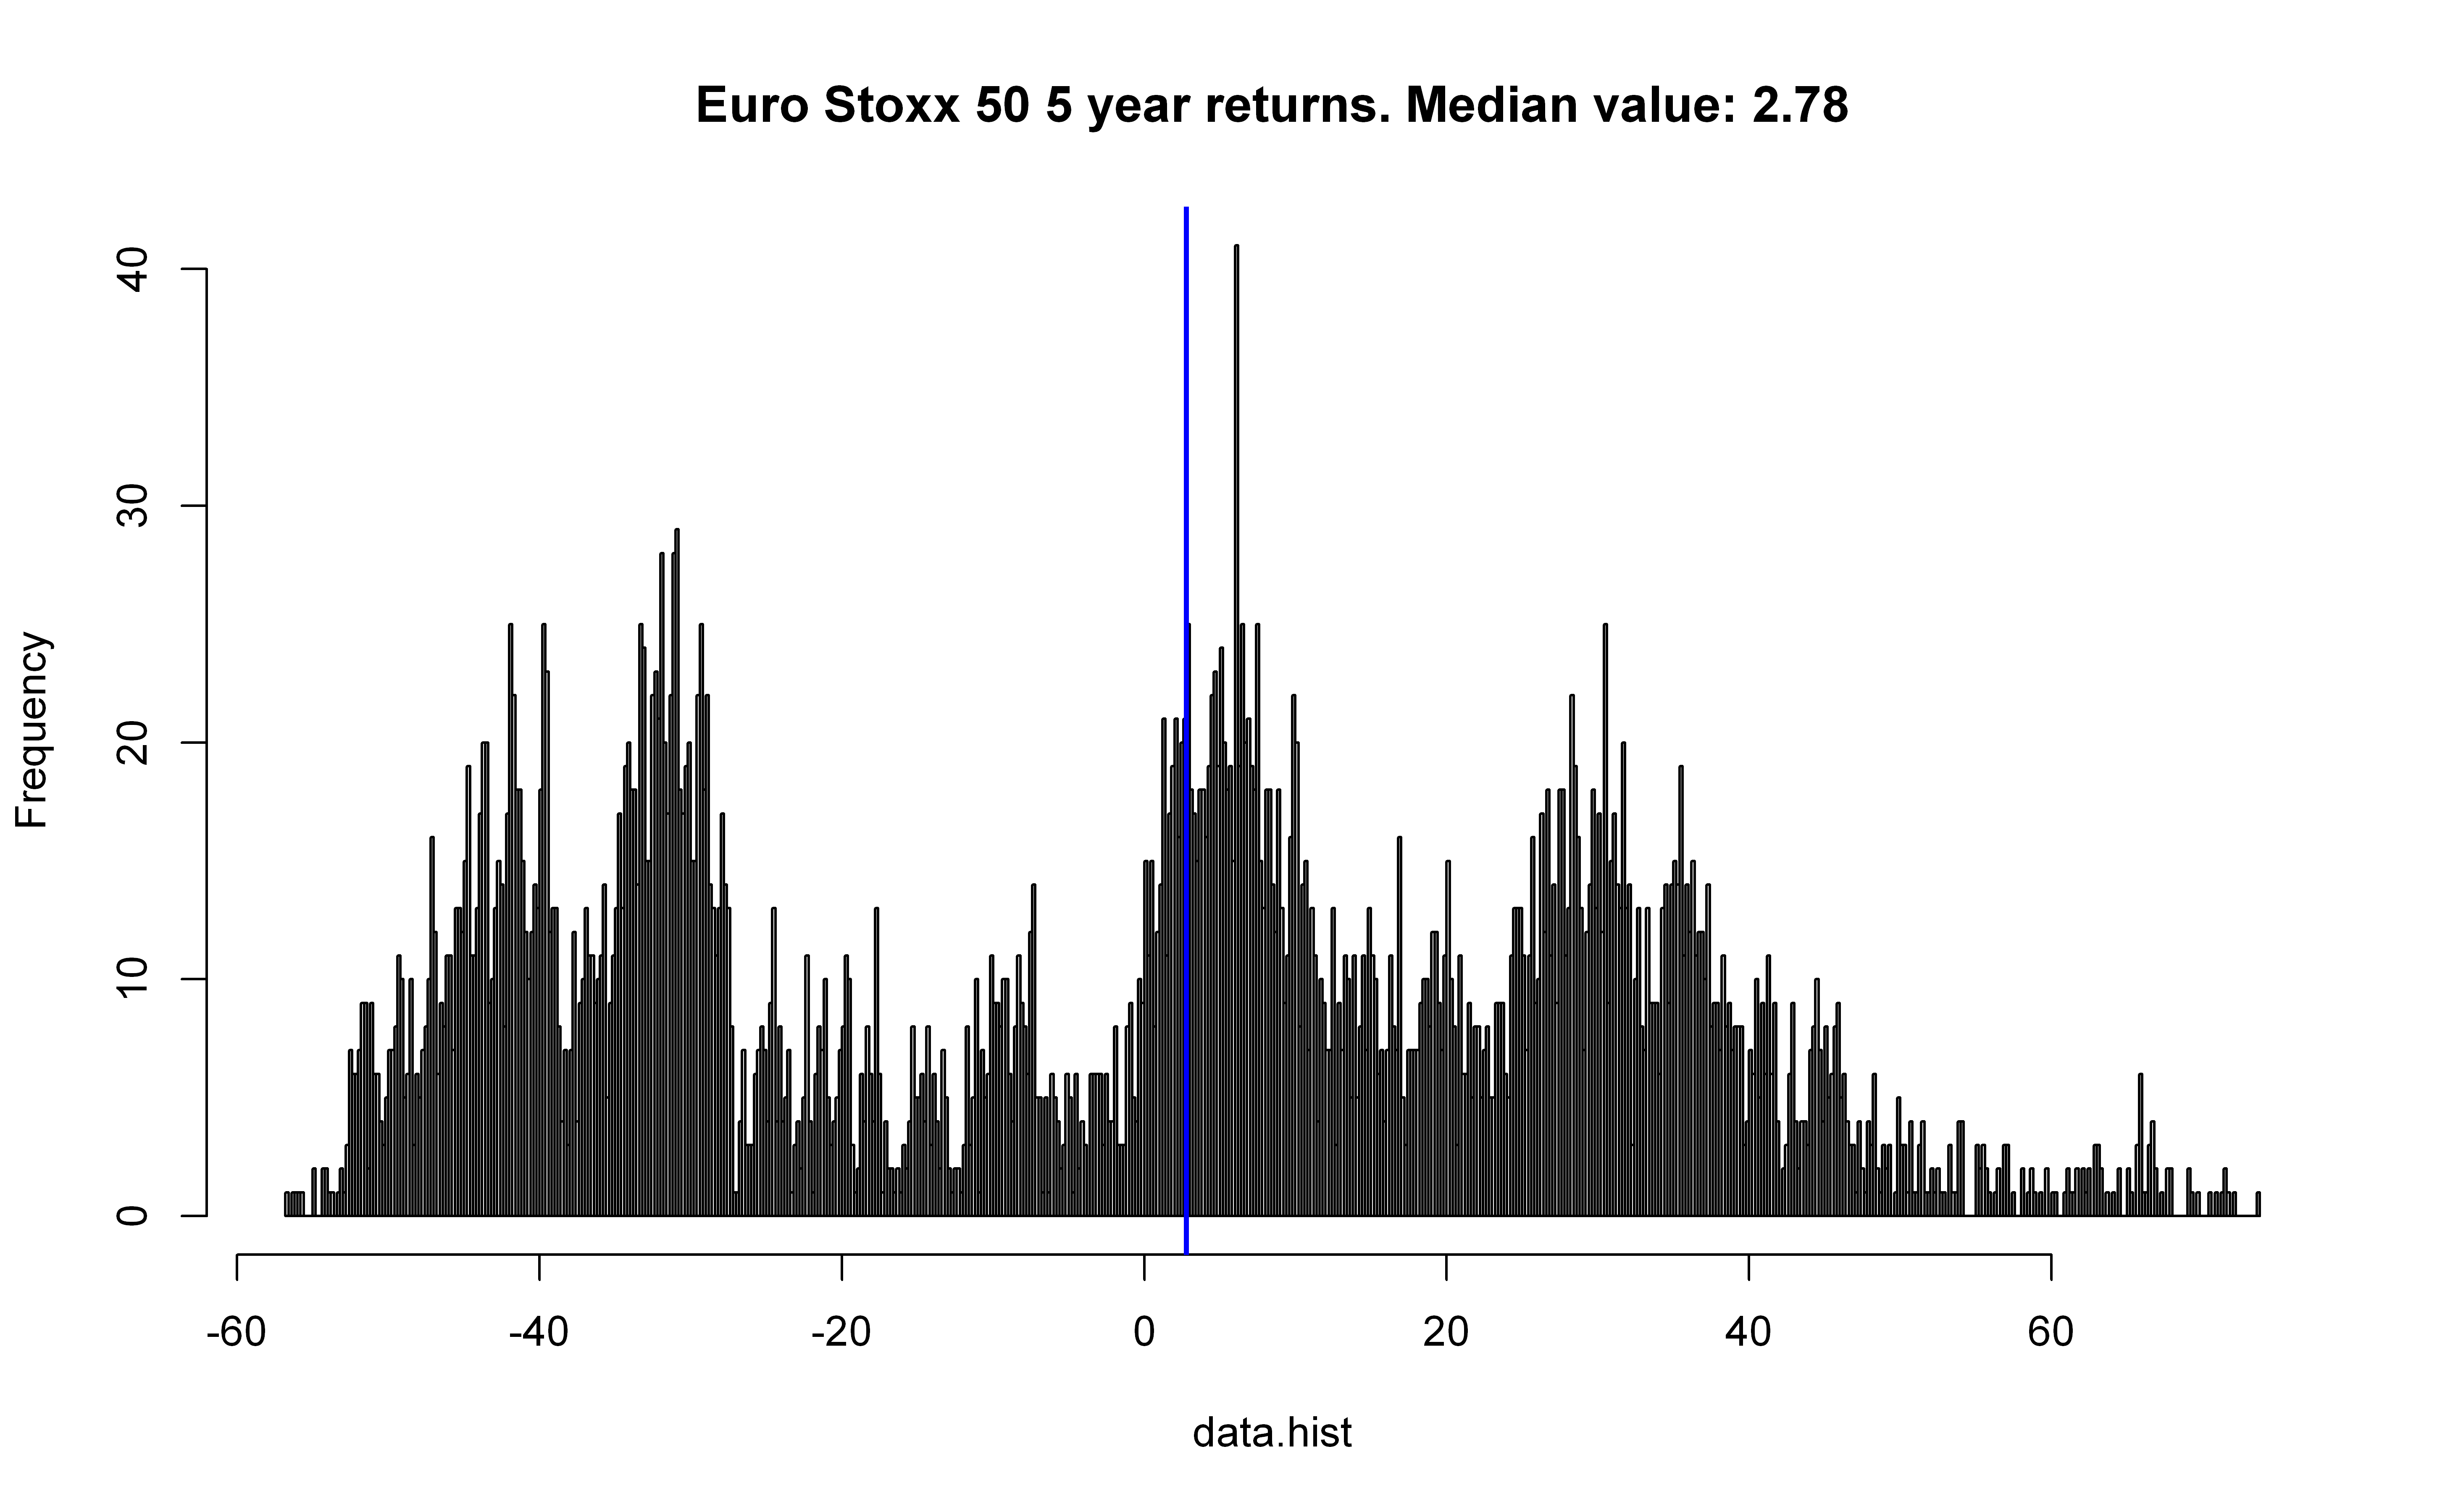

In [24]:
data.hist <- df.data$STOXX50E.Open_YoY5[df.data$date>dt.start]
data.hist <- data.hist[abs(data.hist)>0]
data.med <- median(data.hist)
my.h <- hist(data.hist,breaks=500,
             main=paste("Euro Stoxx 50 5 year returns. Median value:",format(round(data.med, 2), nsmall = 2)))
abline(v = data.med, col = "blue", lwd = 2)
my.h$counts=100*my.h$counts/sum(my.h$counts)

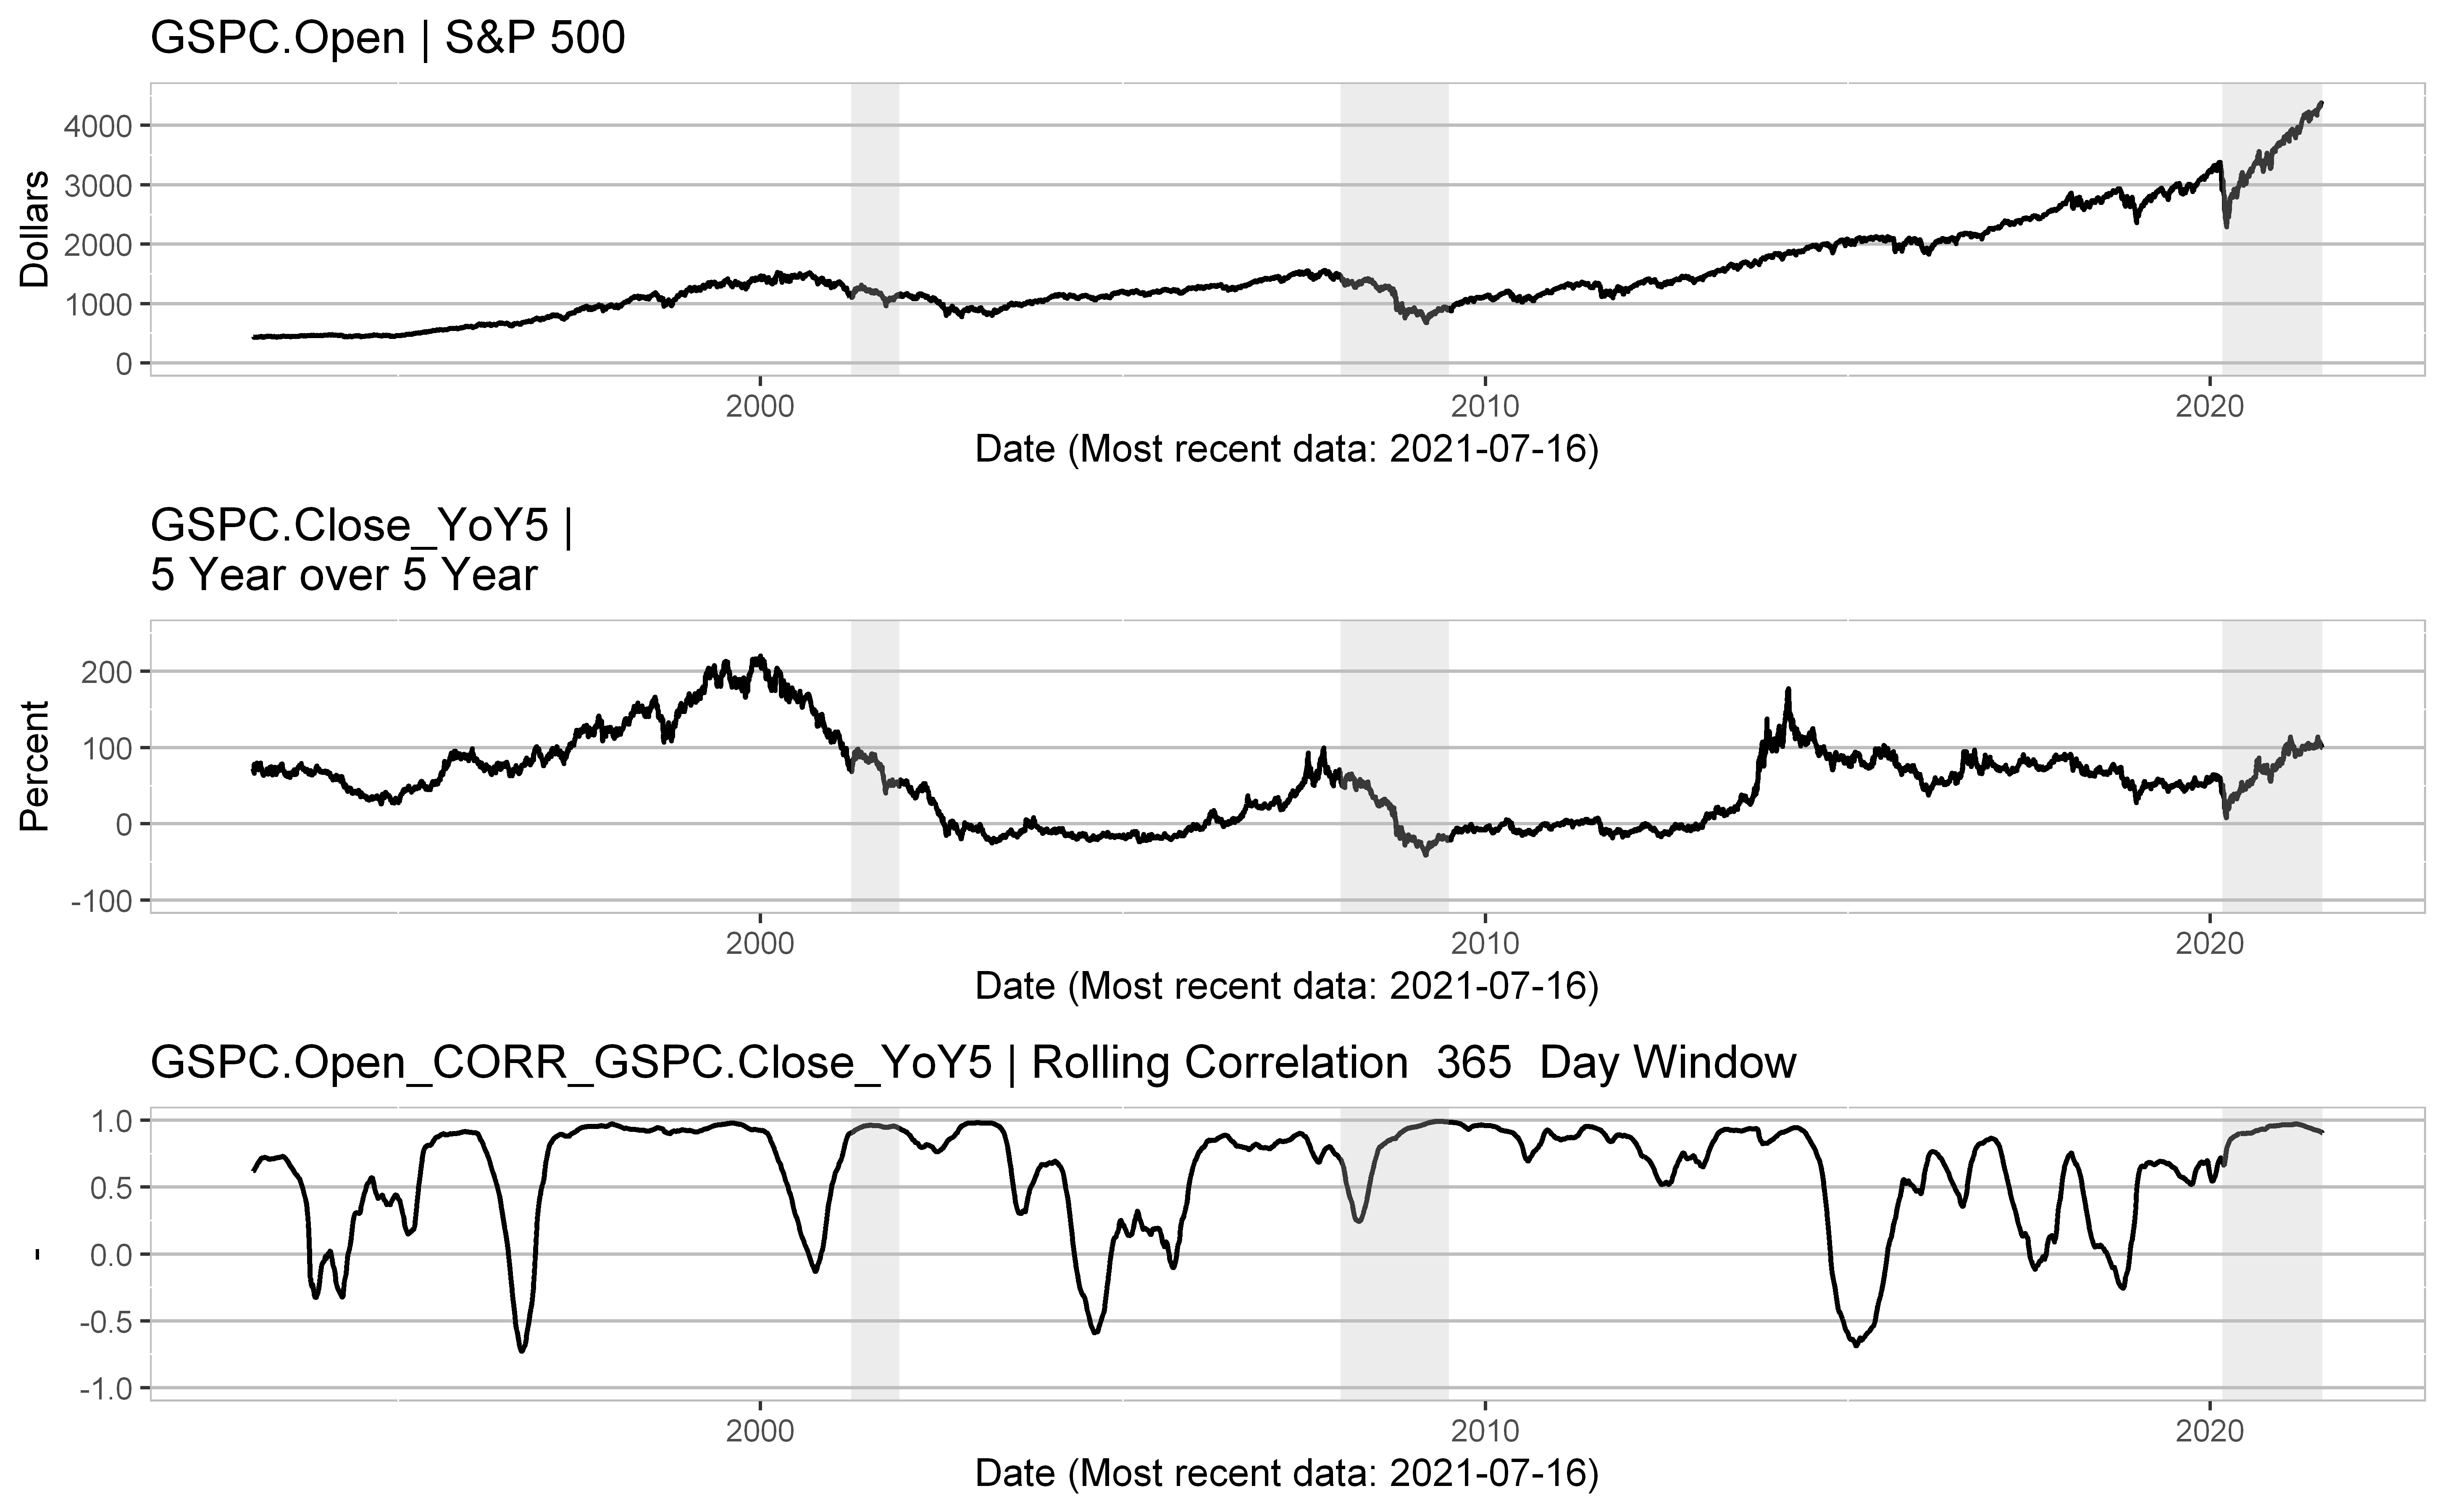

In [25]:
datay1 <- "GSPC.Open"
ylim1 <- c(0, d.GSPC.max)

datay2 <- "GSPC.Close_YoY5"
ylim2 <- c(-100, 250)

dtStart <- as.Date("1jan1993","%d%b%Y")

w <- 365
corrName <- calcRollingCorr(dfRecession, df.data, df.symbols, datay1, ylim1, datay2, ylim2, w, dtStart)


Compare the 1-, 4- and 5- year returns for the S&P

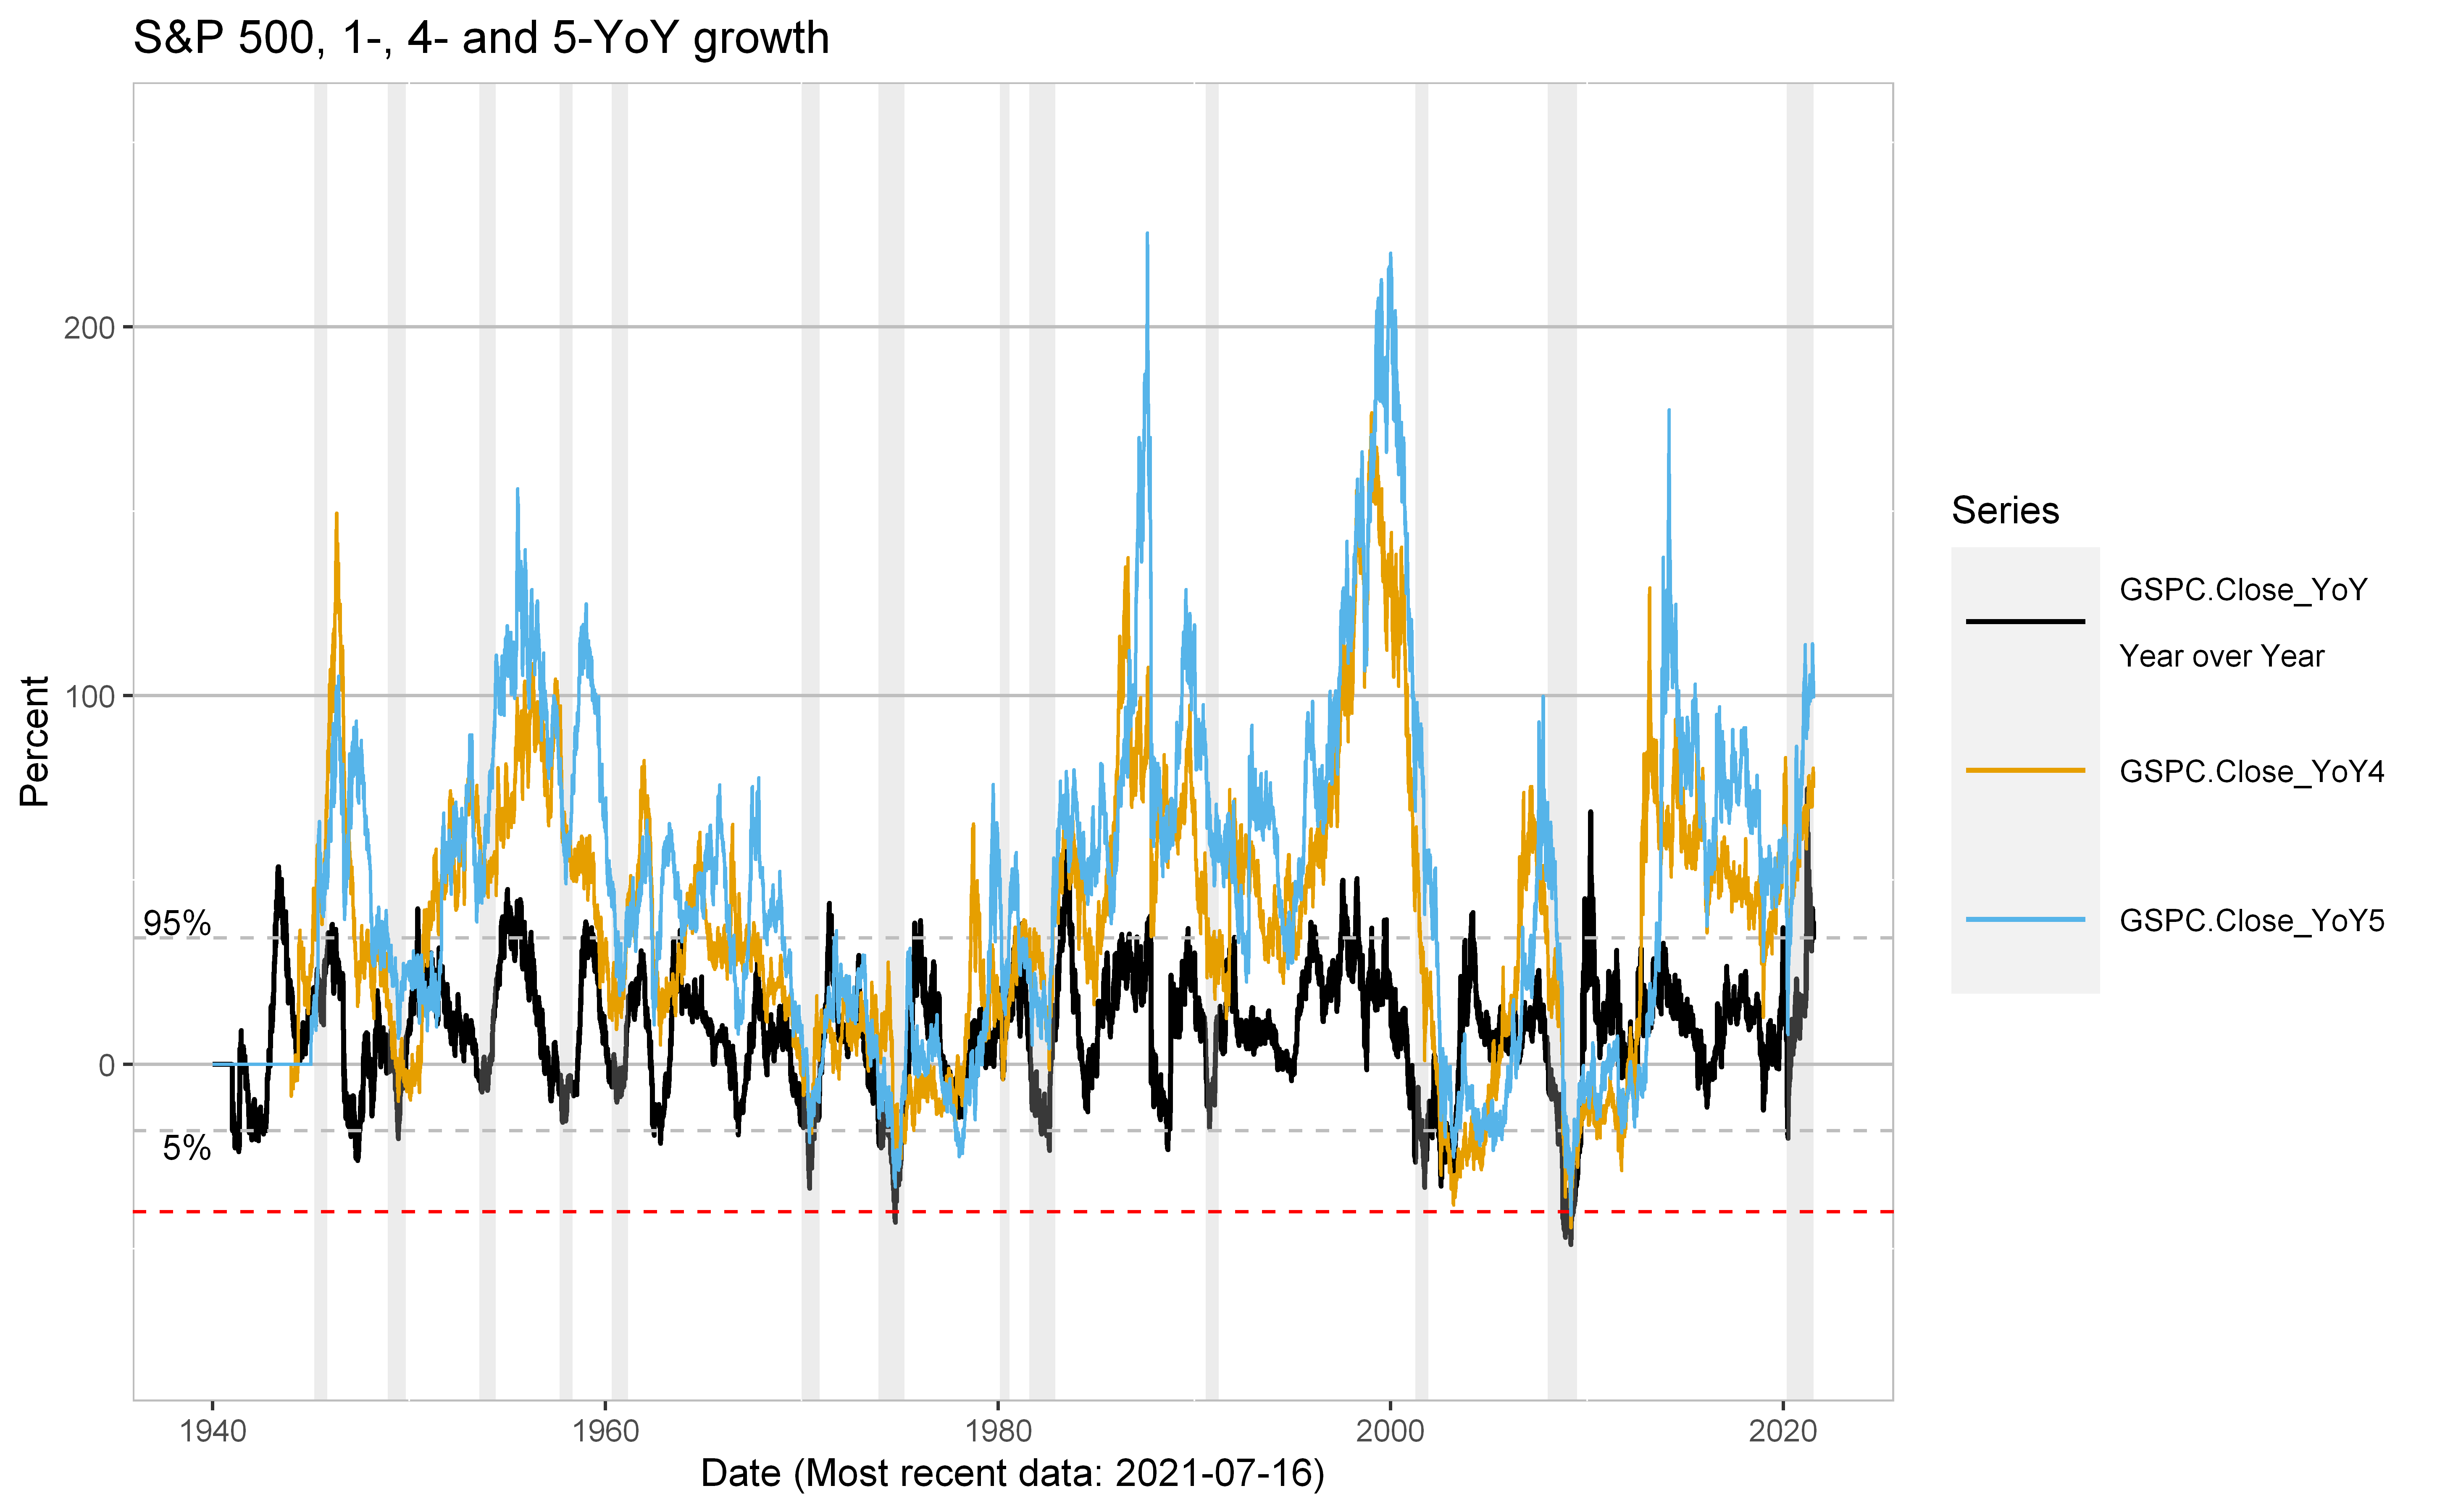

In [26]:
datay.in <- "GSPC.Close_YoY"
datay.aux.1 <- "GSPC.Close_YoY4"
datay.aux.2 <- "GSPC.Close_YoY5"
ylim.in <- c(-75, 250)
dt.start <- as.Date('1940-01-01')
p1 <- plotSingle(datadf_rec=dfRecession,
           datadf=df.data,
           datax="date",
           datay = datay.in,
           titlelabel = "S&P 500, 1-, 4- and 5-YoY growth",
           xlabel = "Date",
           ylabel = getPlotYLabel(df.symbols, datay.in),
           xlim = c(dt.start, Sys.Date()),
           ylim = ylim.in,
           b.legend = TRUE,
           b.percentile = TRUE,
           b.long.legend = TRUE) 
p1 <-p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = df.data[[datay.aux.1]],
    colour = shQuote(datay.aux.1)
  ),
  na.rm = TRUE
)
p1 <- p1 + geom_hline(yintercept = -40,
                      linetype = "dashed",
                      color = "red")

p1 + geom_line(
  data = df.data,
  aes_string(
    x = "date",
    y = datay.aux.2,
    colour = shQuote(datay.aux.2)
  ),
  na.rm = TRUE
)

In [27]:
head(df.data)

,CPIAUCSL,USREC,UNRATE,PCEPI,CCSA,CCNSA,NPPTTL,U6RATE,PAYNSA,TABSHNO,...,nyfed.recession,GPDI.by.GDP,retBase,retBaseShort_TB3MS,eqBase,eqBaseShort_TB3MS,RecInit,RecInit_Smooth,GSPC.Open_CORR_GSPC.Close_YoY4,GSPC.Open_CORR_GSPC.Close_YoY5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>"
1940-01-02,21.48,0,3.4,16.074,1134000,1594000,109039,11.7,30966.94,837.197,...,0.002613564,0.1474478,0.0000000000,2.828104e-05,0.2108514,1.130128e-06,0,-0.0097304674,1,1
1940-01-03,21.48,0,3.4,16.074,1134000,1594000,109039,11.7,30967.87,837.197,...,0.002614954,0.1474478,0.0110237337,2.916483e-05,0.2131886,2.295573e-06,0,-0.0004193579,1,1
1940-01-04,21.48,0,3.4,16.074,1134000,1594000,109039,11.7,30968.81,837.197,...,0.002616345,0.1474478,-0.0031372575,3.004861e-05,0.2125209,3.496334e-06,0,0.0095124384,1,1
1940-01-05,21.48,0,3.4,16.074,1134000,1594000,109039,11.7,30969.74,837.197,...,0.002617736,0.1474478,-0.0055139959,3.093239e-05,0.2113523,4.732411e-06,0,-0.0072622096,1,1
1940-01-06,21.48,0,3.4,16.074,1134000,1594000,109039,11.7,30970.68,837.197,...,0.002619129,0.1474478,0.0002632618,3.181617e-05,0.2114079,6.003805e-06,0,-0.0096270614,1,1
1940-01-07,21.48,0,3.4,16.074,1134000,1594000,109039,11.7,30971.61,837.197,...,0.002620521,0.1474478,0.0002631925,3.269996e-05,0.2114636,7.310516e-06,0,-0.0052248933,1,1


In [28]:
2.0^0.25

[1] 1.189207

In [29]:
1.5^0.2

[1] 1.084472